In [1]:
from pathlib import Path
import sys
import json
import datetime

PROJ_DIR = Path.cwd().parent.parent
sys.path.append(str(PROJ_DIR))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import animation
import matplotlib.font_manager as fm
from IPython.display import HTML

import numpy as np
import pandas as pd

from src.defaults import ROOT_DIR
from src.checkpoint import CheckpointableData, Checkpointer
from src.config import BaseConfig, Require
from src.shared import get_env
from src.smbpo import SMBPO
from src.tester import Tester

fm.fontManager.addfont('../resources/arial.ttf')

ROOT_DIR = Path(ROOT_DIR)
assert ROOT_DIR.is_dir(), ROOT_DIR
LOGS_DIR = ROOT_DIR / 'logs' / 'tracking'

params = {
    'font.family': 'Arial',
    'font.serif': 'Arial',
    # 'font.style': 'italic',
    # 'font.weight': 'normal', #or 'blod'
    'font.size': 15,  # or large,small
    'animation.ffmpeg_path': r'/usr/bin/ffmpeg'
}
rcParams.update(params)

class Config(BaseConfig):
    env_name = Require(str)
    env_cfg = {}
    seed = 1
    epochs = 600
    alg_cfg = SMBPO.Config()
    alg = 'DRPO'

def smooth(data, sm=1):
    '''Borrow from
    https://blog.csdn.net/qq_43280087/article/details/119894398
    '''
    if sm > 1:
        z = np.ones_like(data)
        y = np.ones(sm)*1.0
        d = np.convolve(y, data, "same")/np.convolve(y, z, "same")
    return d

/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Test log directory: /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-25-23_15.27.08_DRPO_22/test-2023-02-25-21-02-56
Set log dir to /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-25-23_15.27.08_DRPO_22/test-2023-02-25-21-02-56, log filename to log.txt
Creating new log file named log.txt
[21:02:56] Test log directory: /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-25-23_15.27.08_DRPO_22/test-2023-02-25-21-02-56


/home/yudongjie/safe_proj/safe-control-gym/safe_control_gym/utils/configuration.py:72: UserWarning: No agent/task config given.
  warnings.warn("No agent/task config given.")
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[21:02:57] Data load succeeded
[21:02:57] Solver load epoch 314 succeeded
surr 0: d_lon: 8, d_lat: 3.5, u: 4.5
0.00021755695


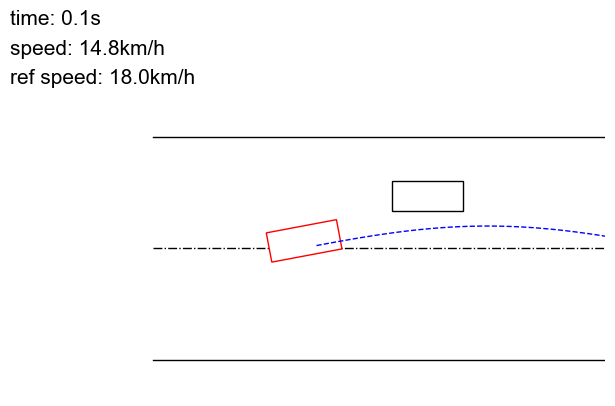

0.00021606684


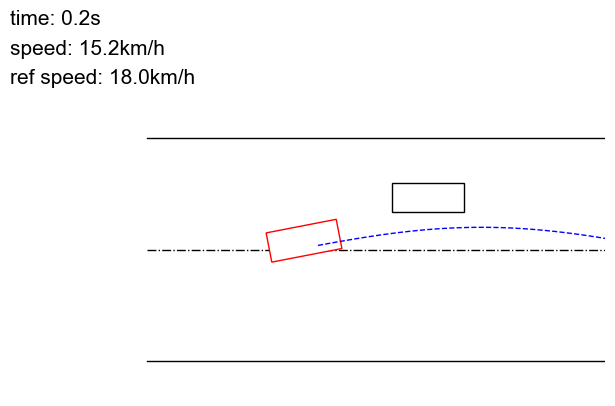

0.00021606684


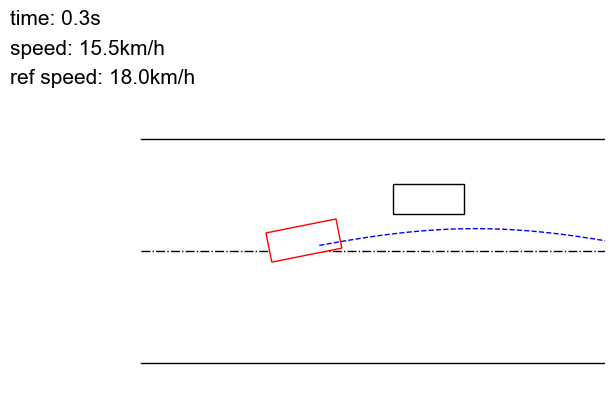

0.00021457672


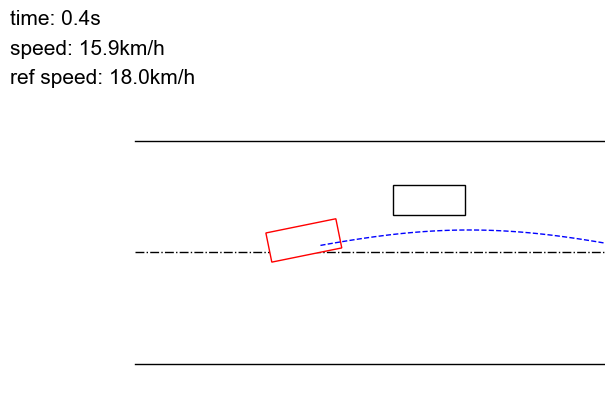

0.00021457672


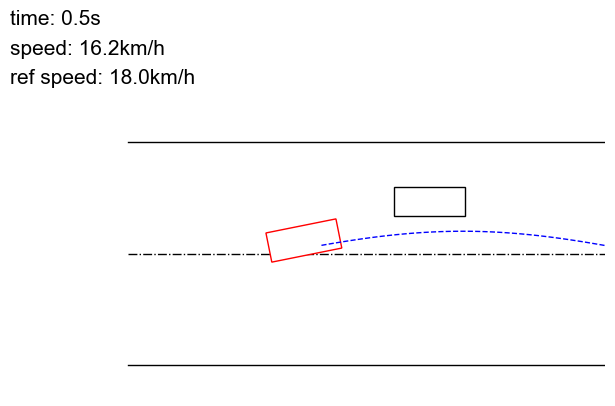

0.00021457672


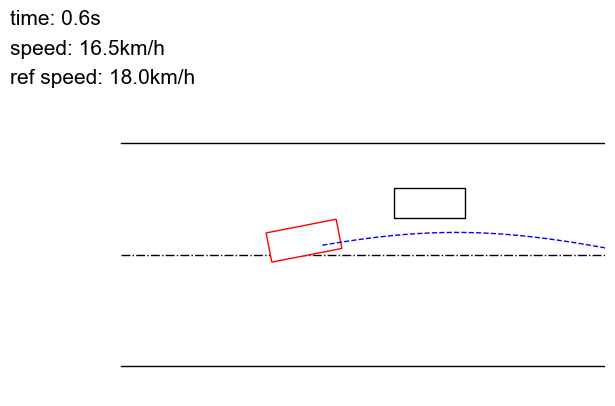

0.00021457672


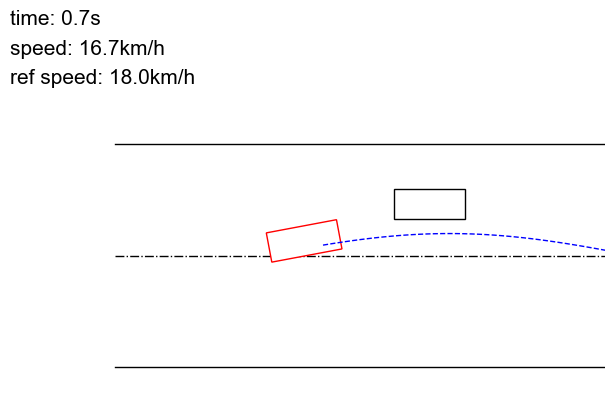

0.00021457672


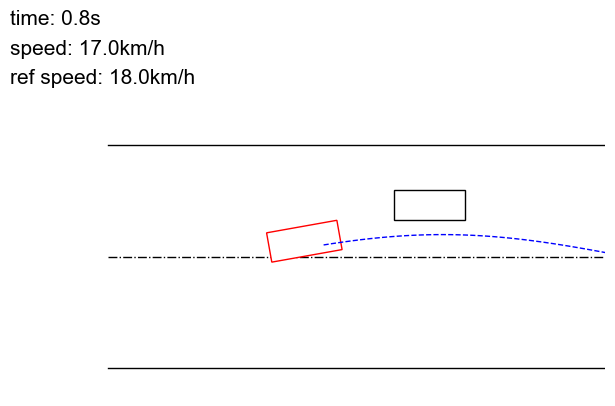

0.00021457672


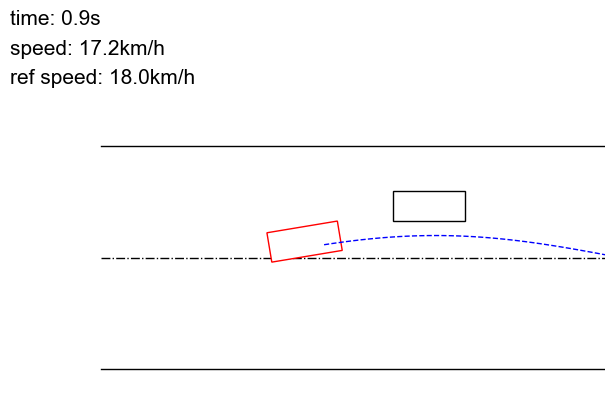

0.00021457672


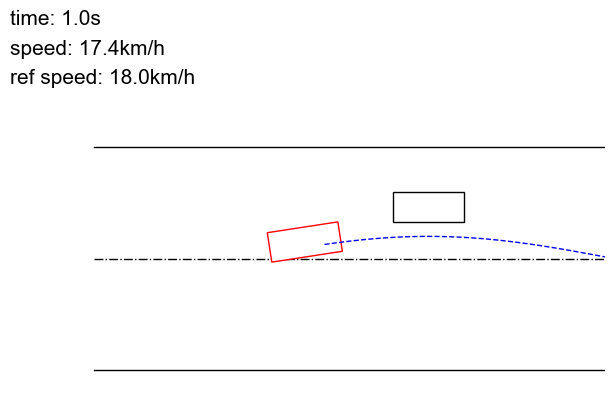

0.00021457672


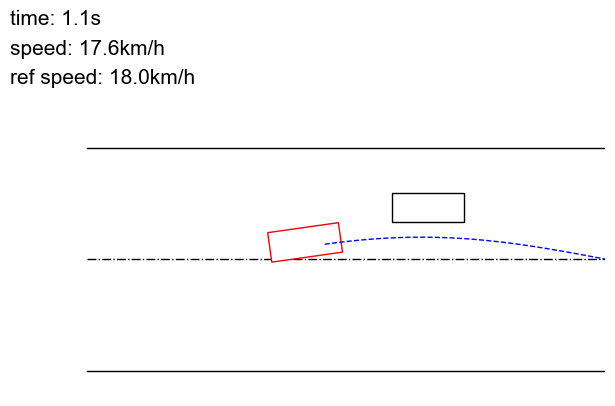

0.00021457672


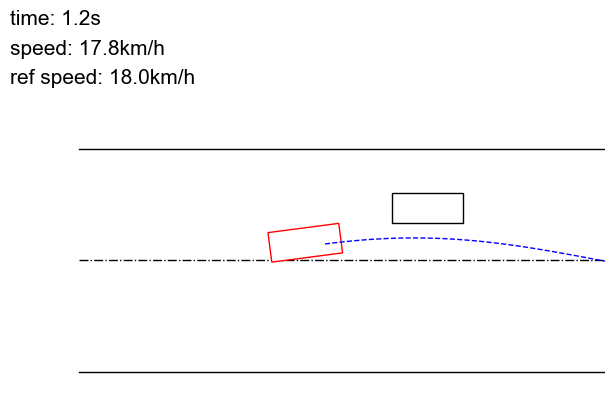

0.00021457672


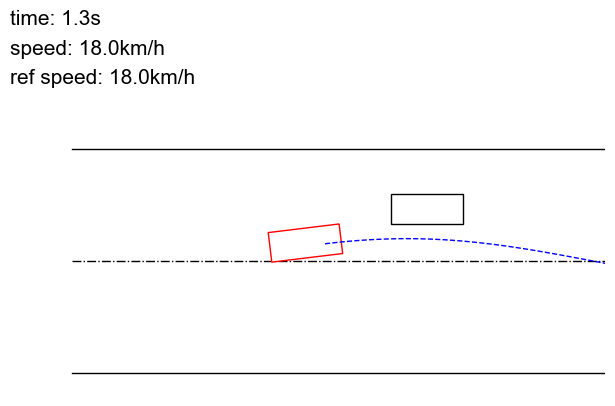

0.00021457672


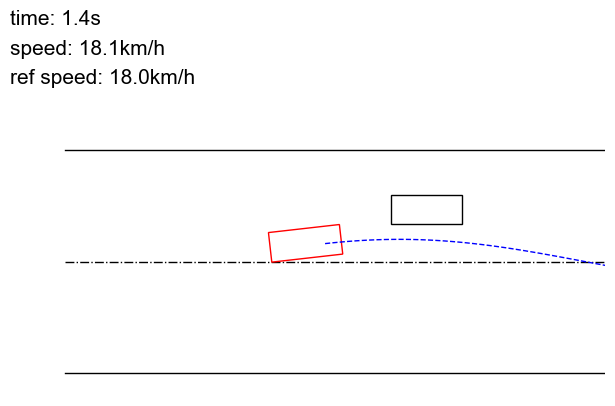

0.00021606684


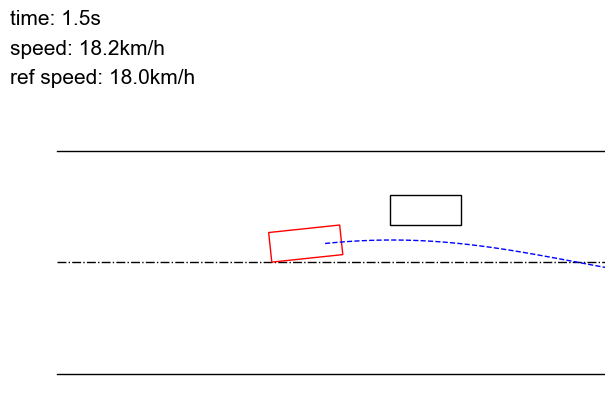

0.00021606684


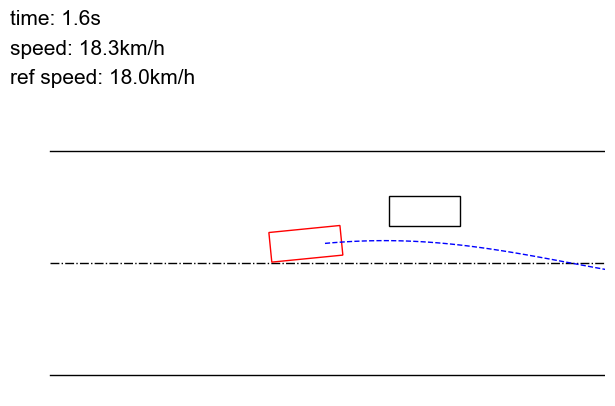

0.00021755695


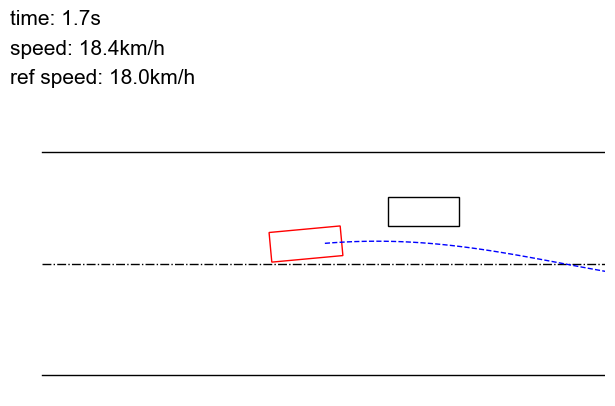

0.00021755695


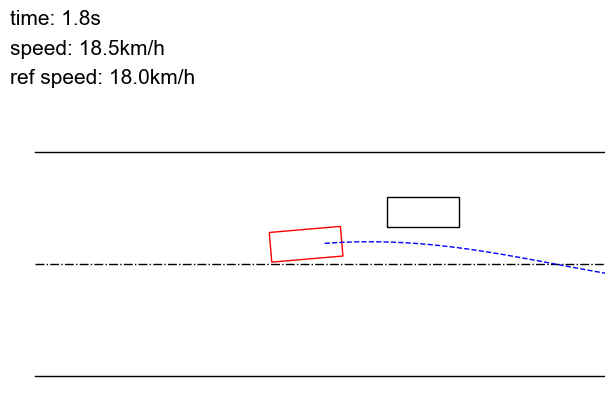

0.00021904707


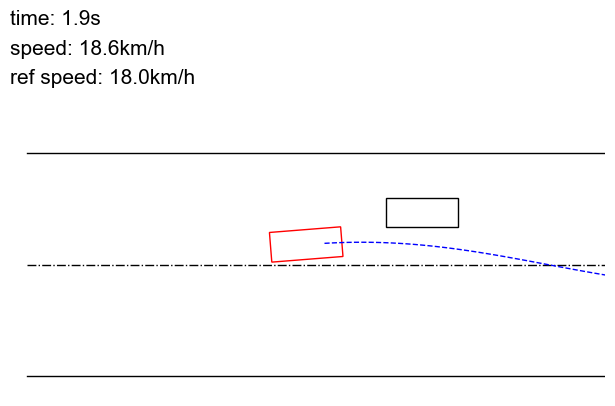

0.00022053719


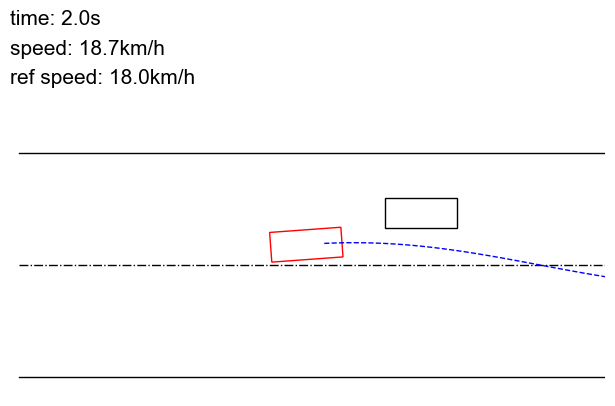

0.0002220273


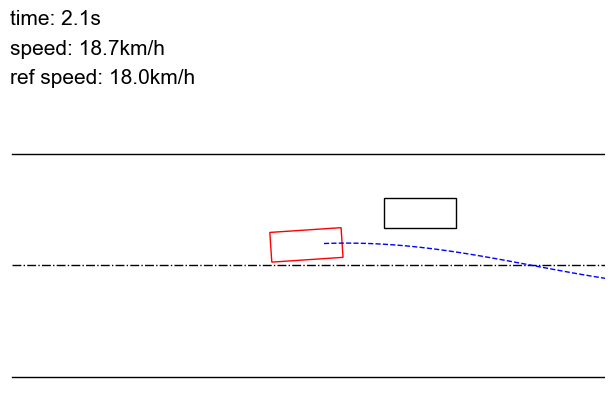

0.00022351742


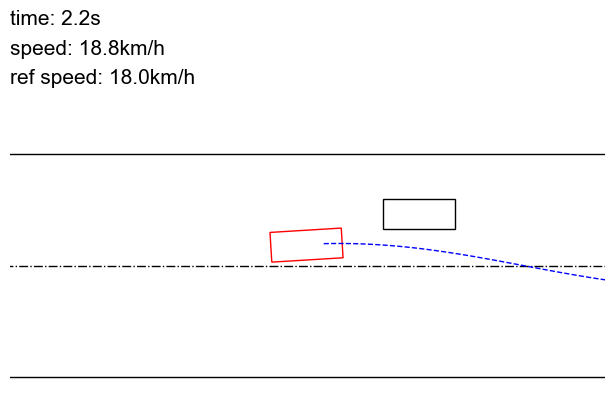

0.00022500753


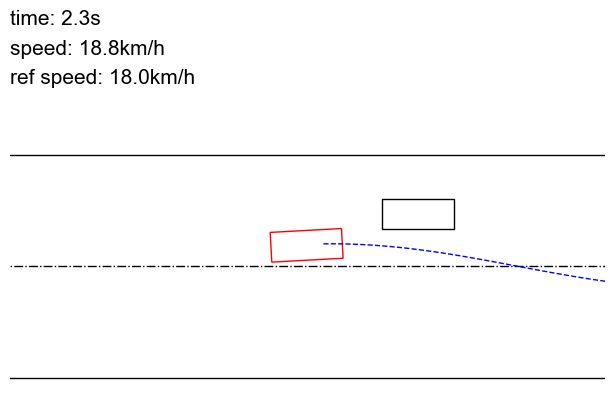

0.00022798777


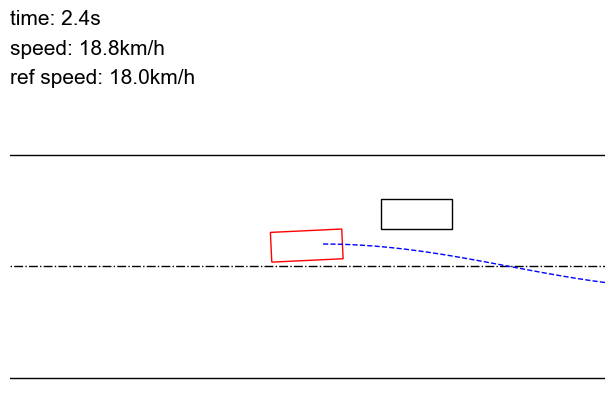

0.00022947788


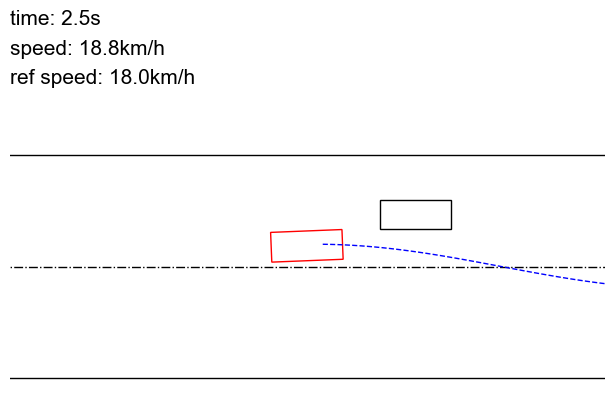

0.00023394823


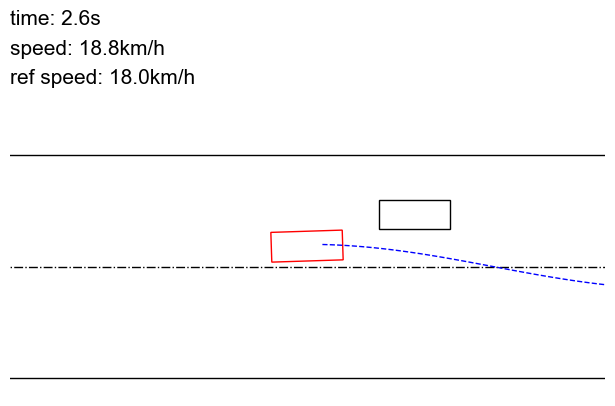

0.00023692846


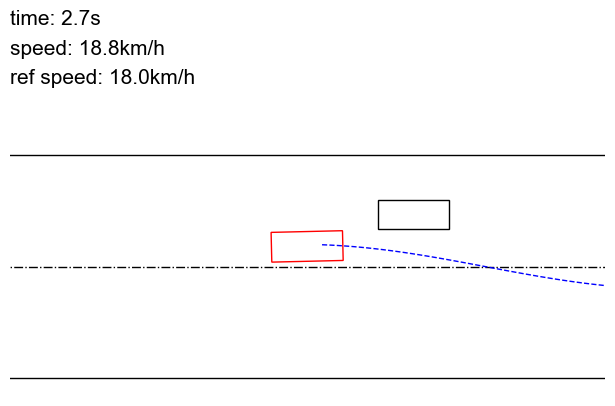

0.00024139881


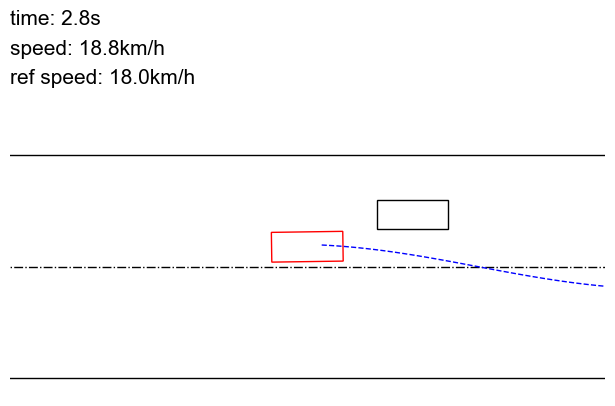

0.00024586916


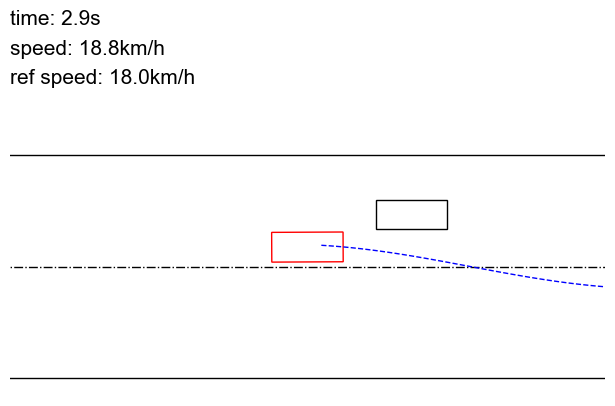

0.00025182962


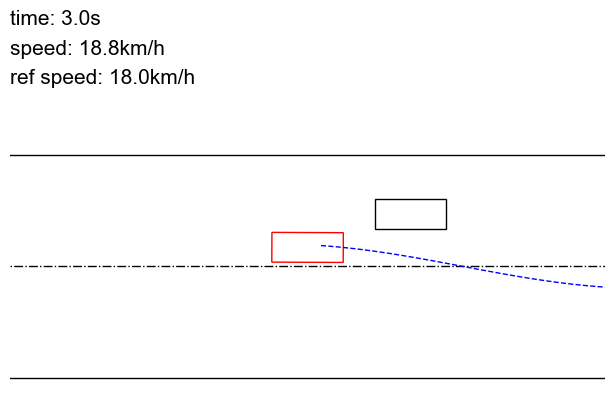

0.0002592802


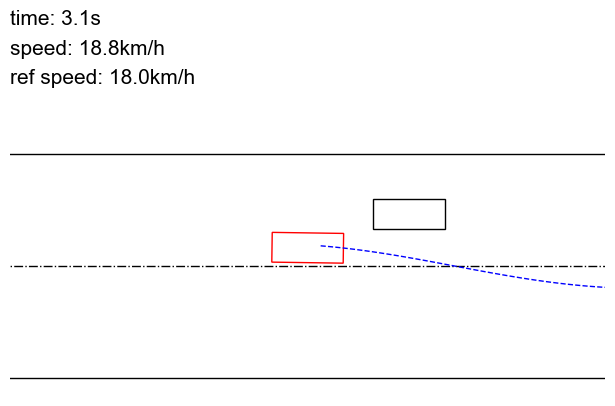

0.00026673079


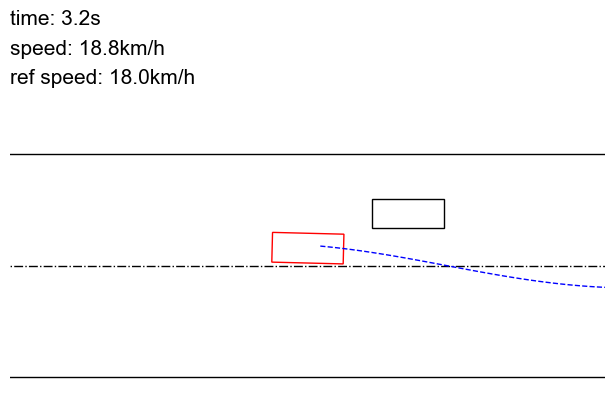

0.00027418137


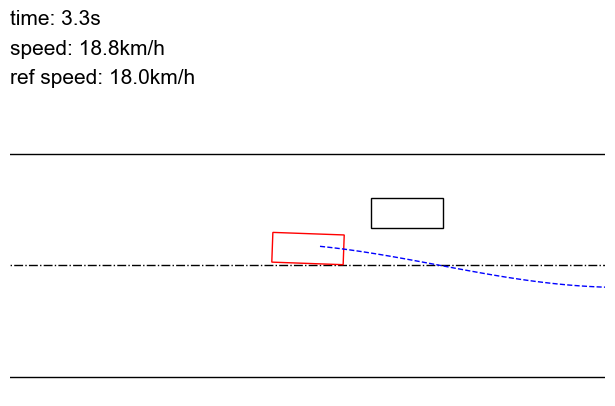

0.00028163195


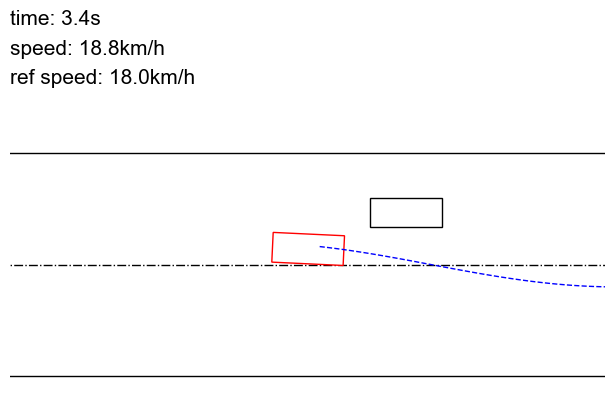

0.0002875924


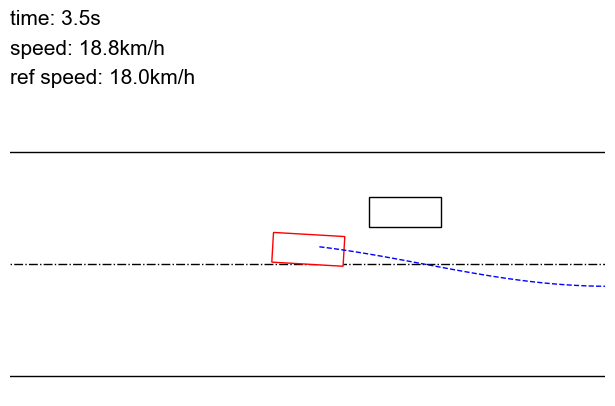

0.000295043


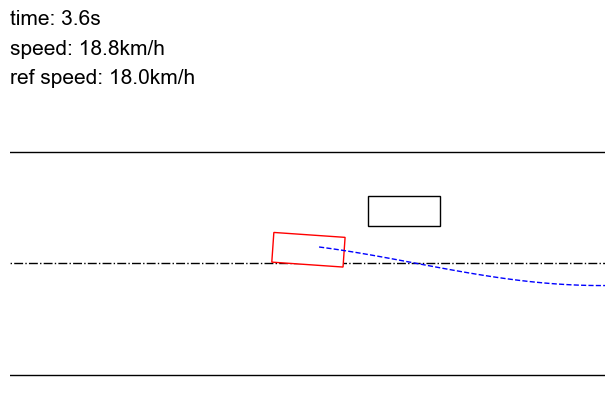

0.00030100346


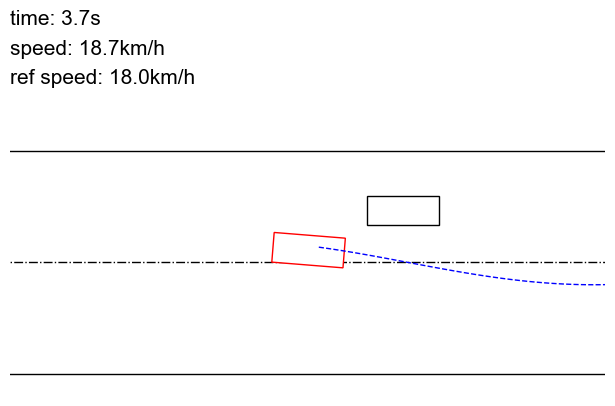

0.0003039837


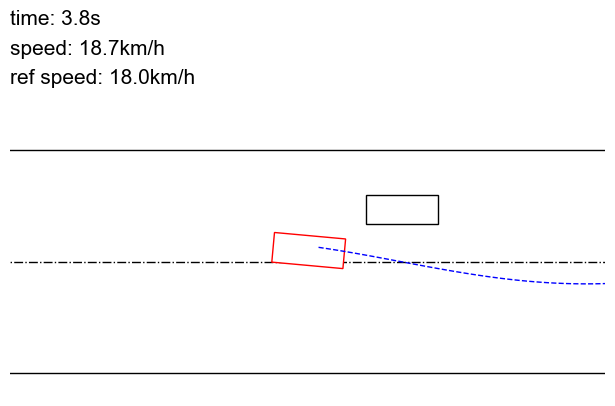

0.0003039837


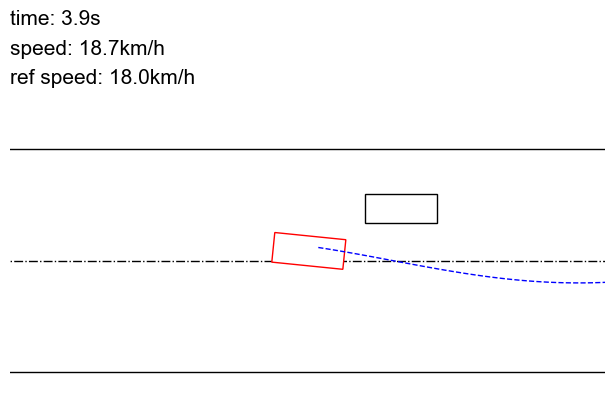

0.00030100346


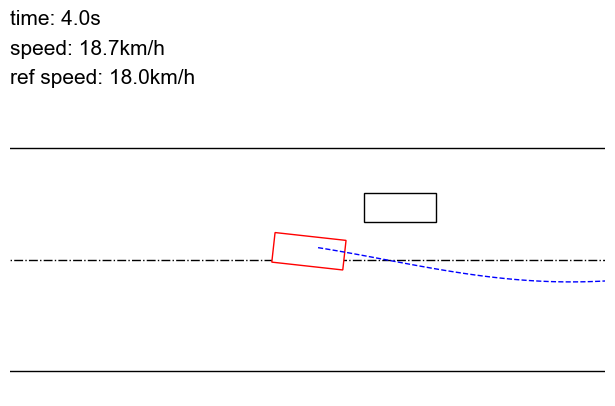

0.00029802322


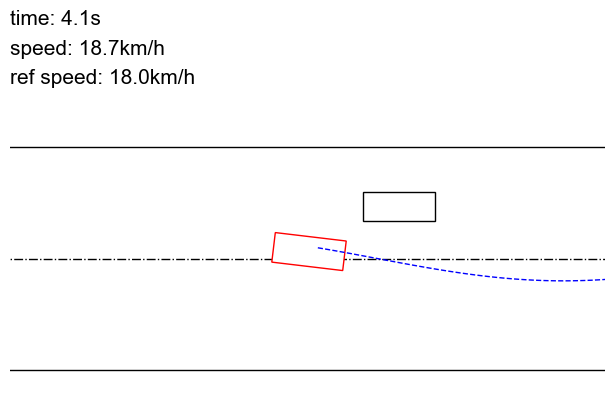

0.00029206276


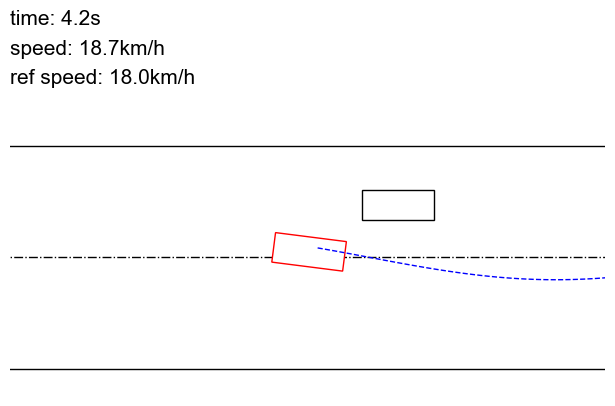

0.00028461218


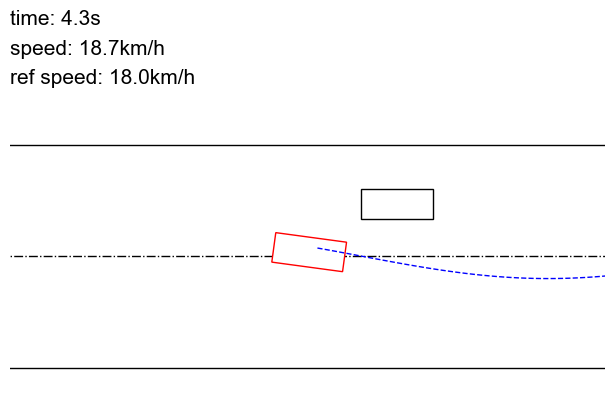

0.0002786517


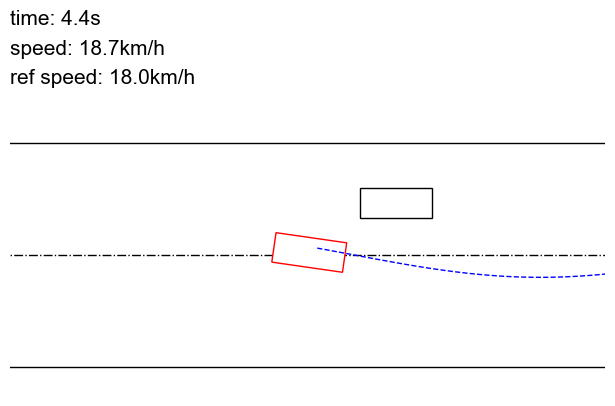

0.00027120113


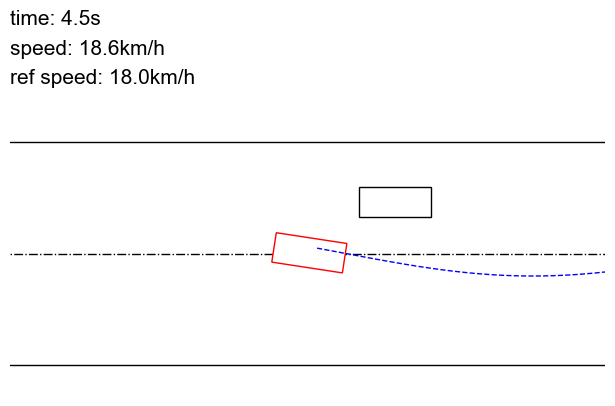

0.00026226044


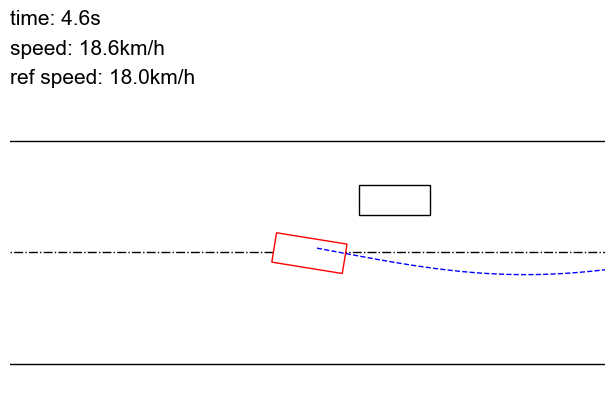

0.00025629997


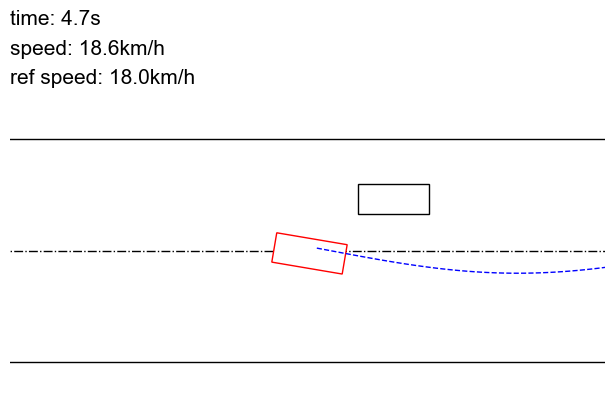

0.0002503395


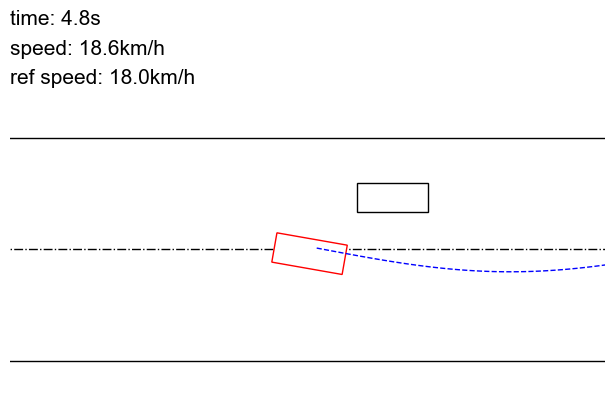

0.00024586916


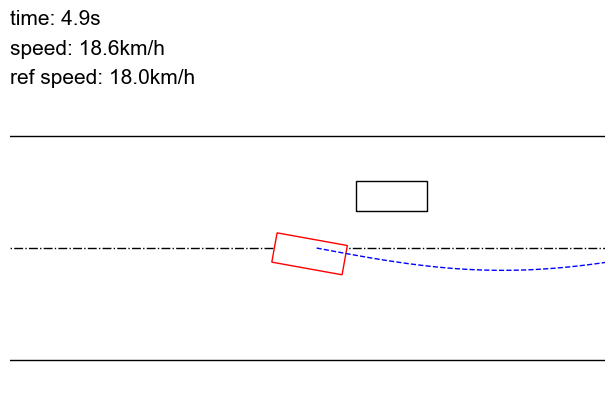

0.00024139881


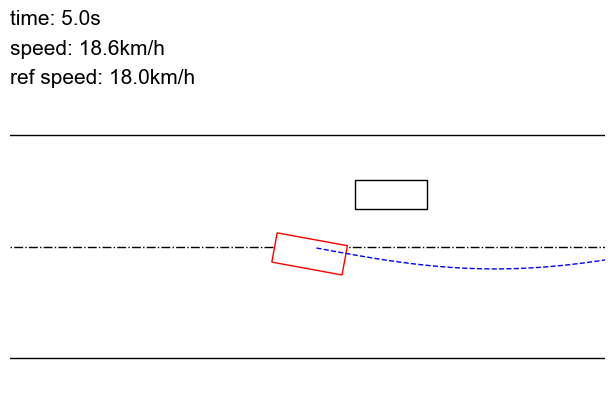

0.00023841858


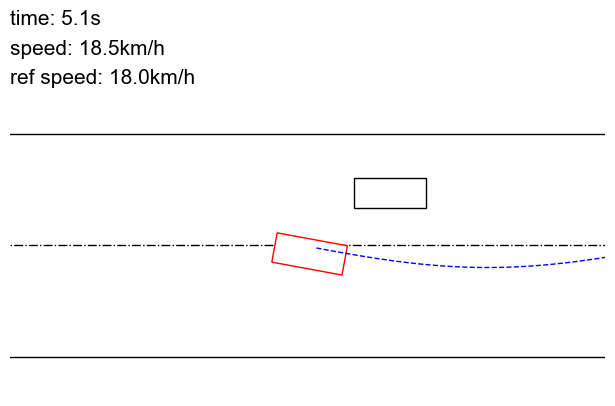

0.00023543835


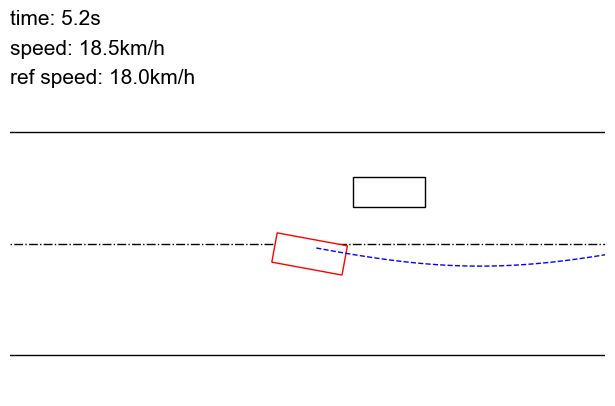

0.00023394823


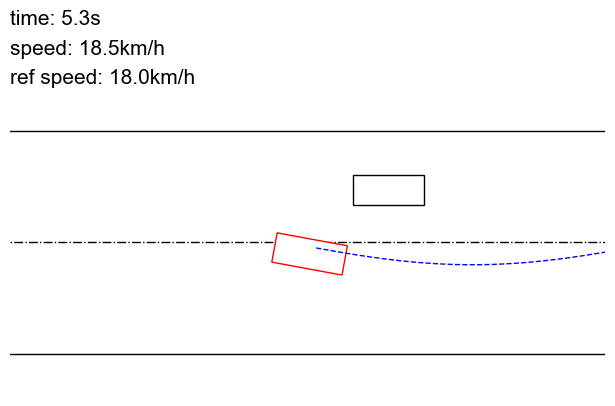

0.000230968


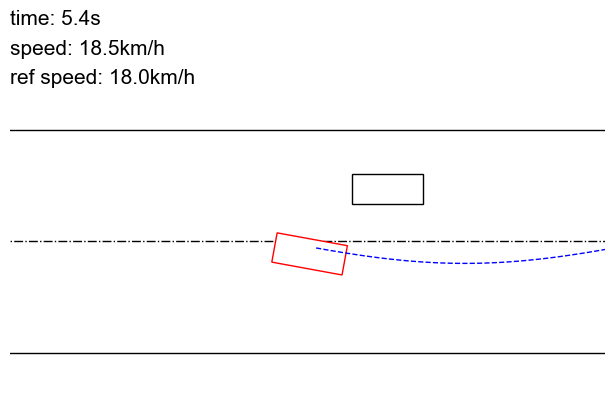

0.00022947788


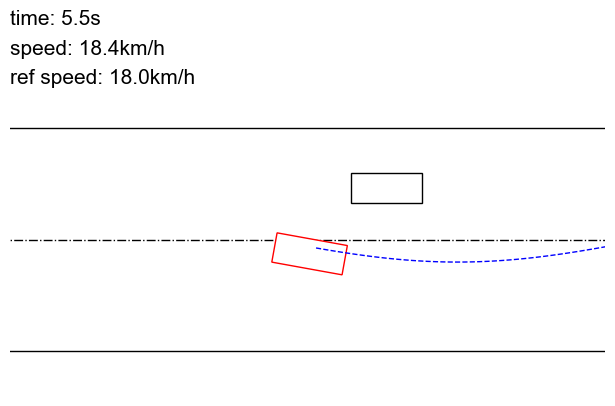

0.00022798777


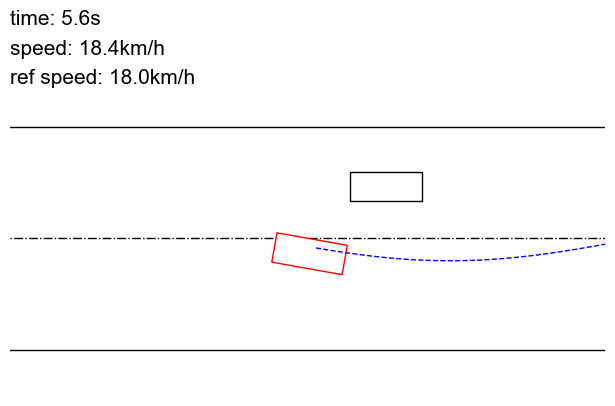

0.00022649765


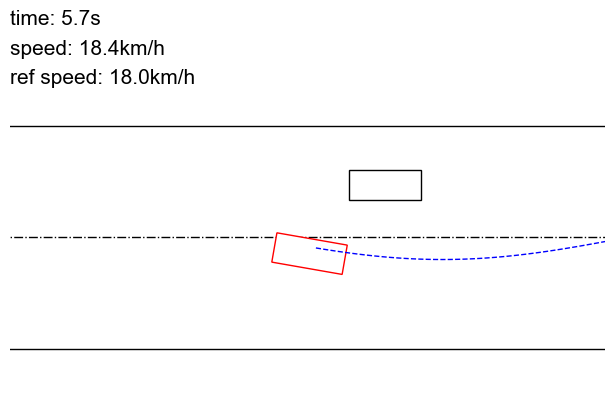

0.00022500753


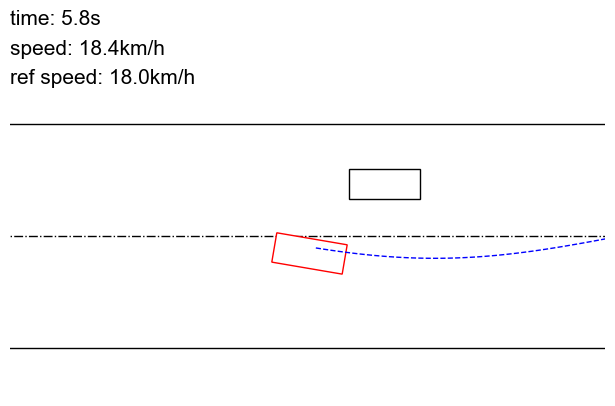

0.00022500753


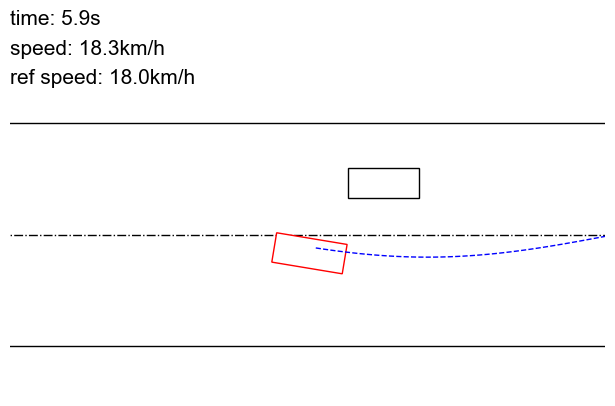

0.00022351742


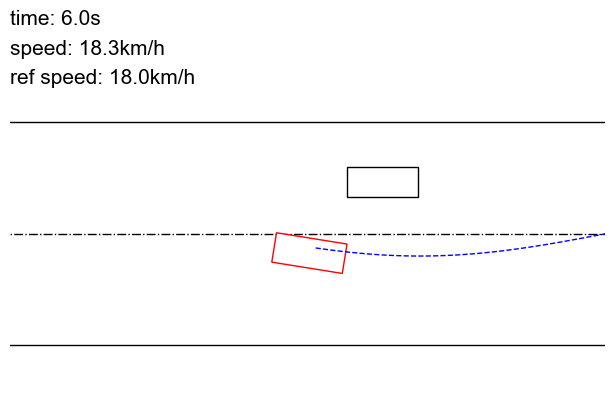

0.00022351742


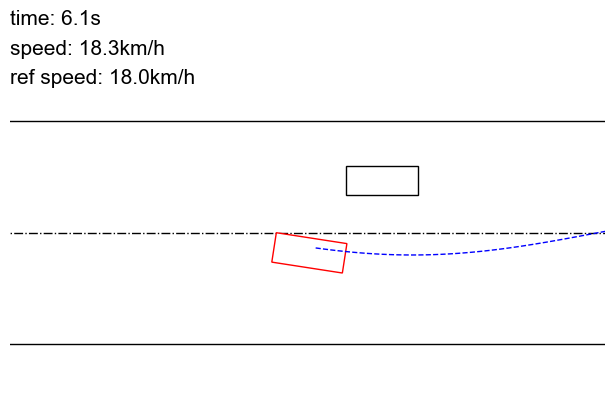

0.00022351742


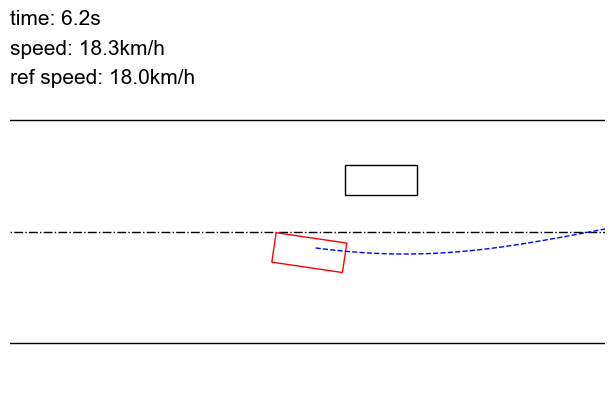

0.00022351742


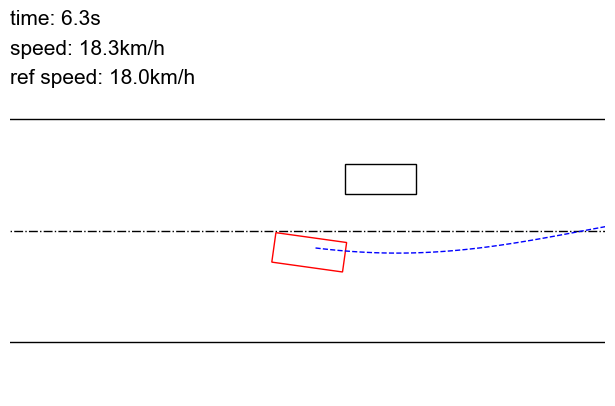

0.00022351742


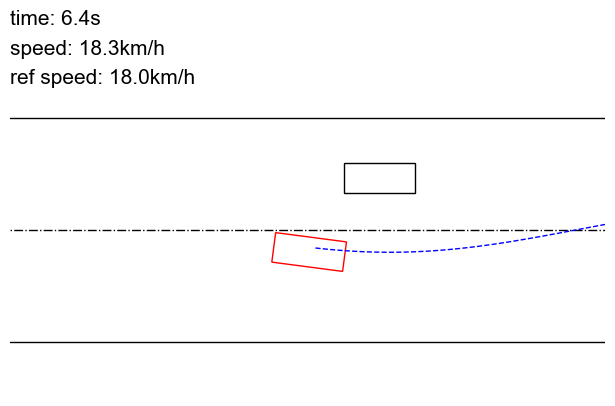

0.0002220273


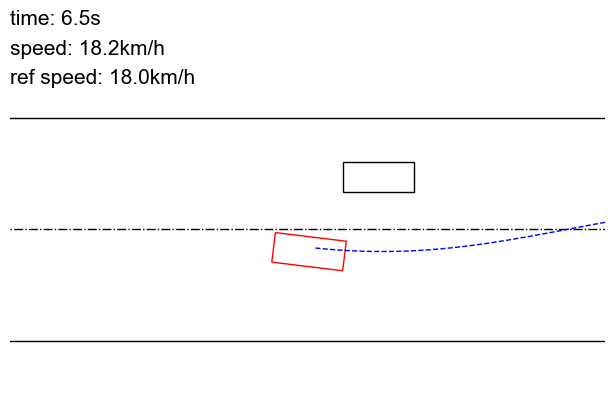

0.0002220273


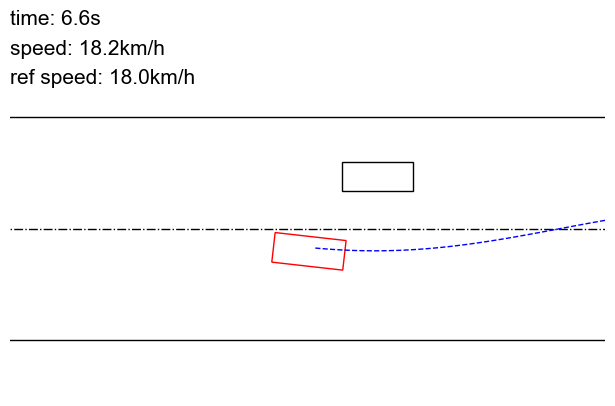

0.0002220273


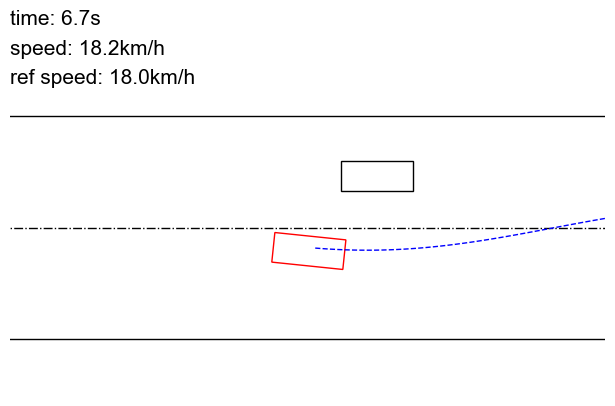

0.0002220273


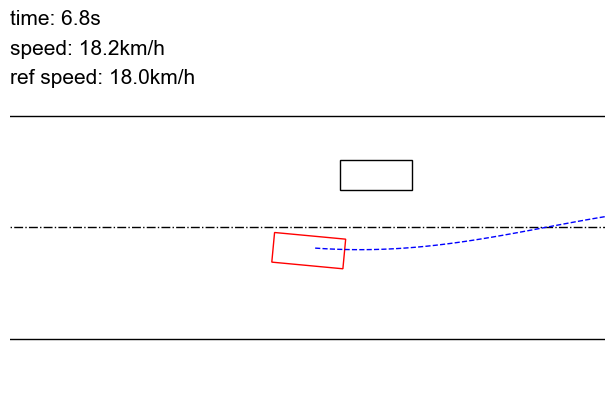

0.0002220273


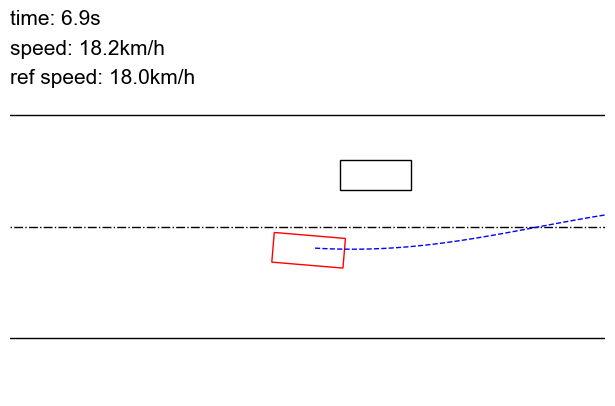

0.00022351742


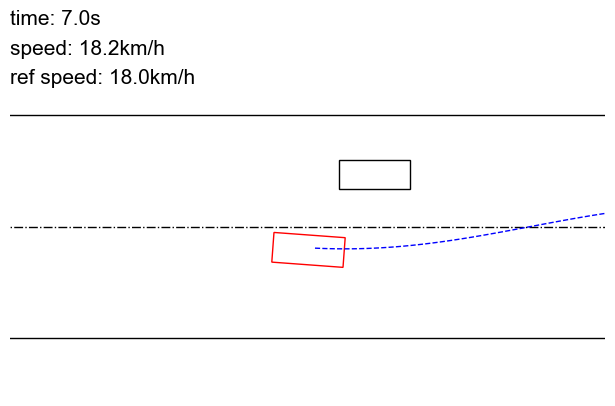

0.00022351742


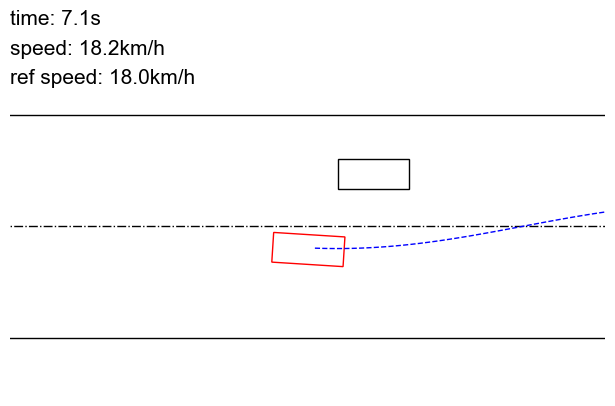

0.00022351742


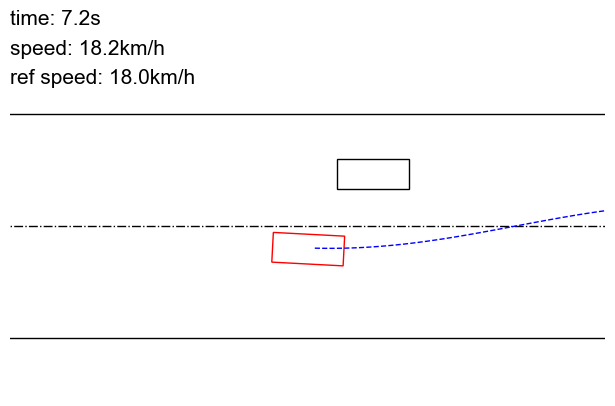

0.00022351742


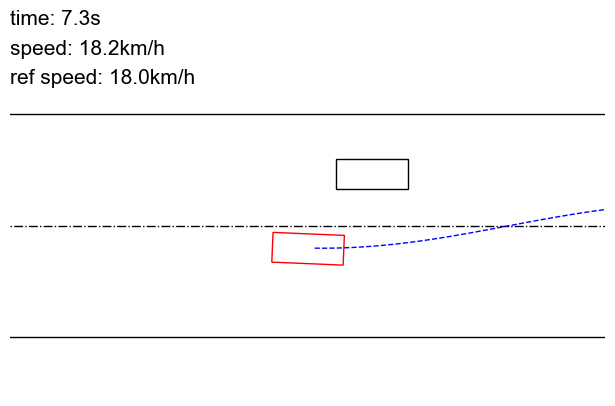

0.00022500753


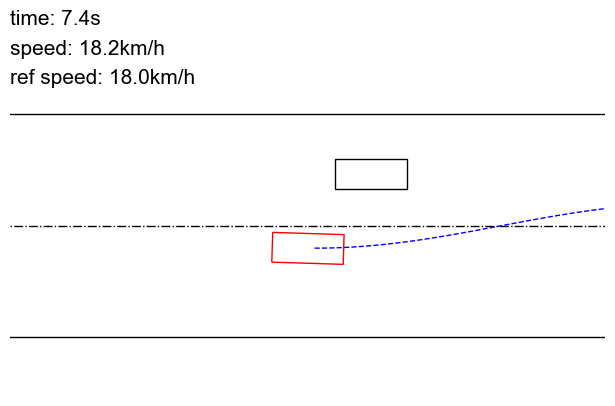

0.00022500753


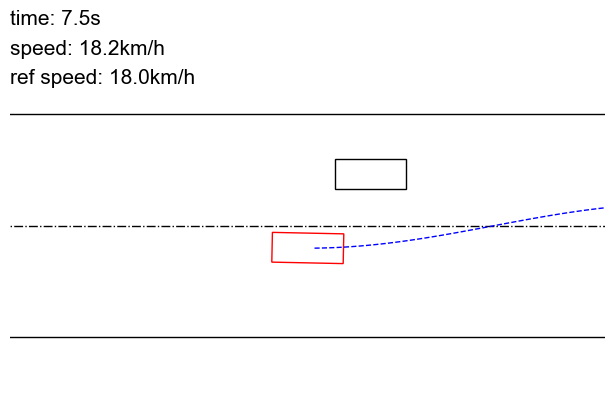

0.00022649765


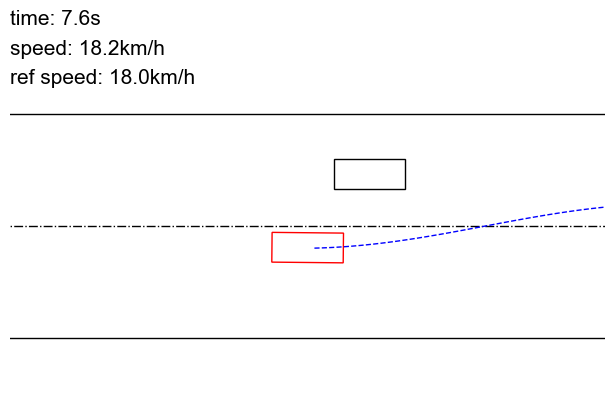

0.00022649765


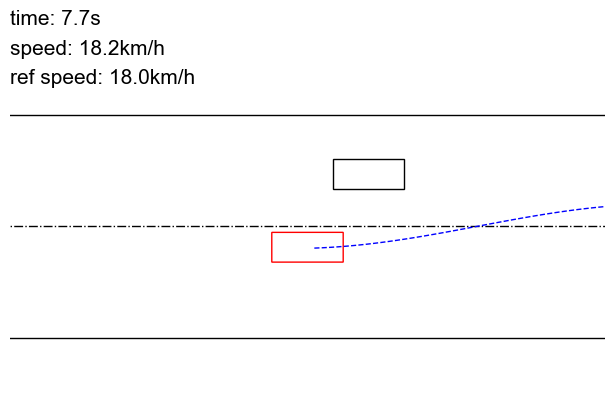

0.00022798777


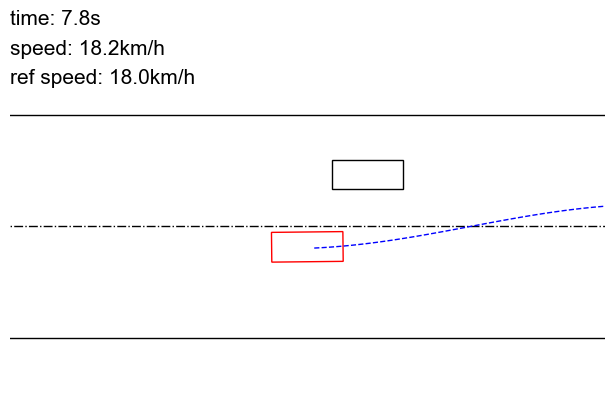

0.00022947788


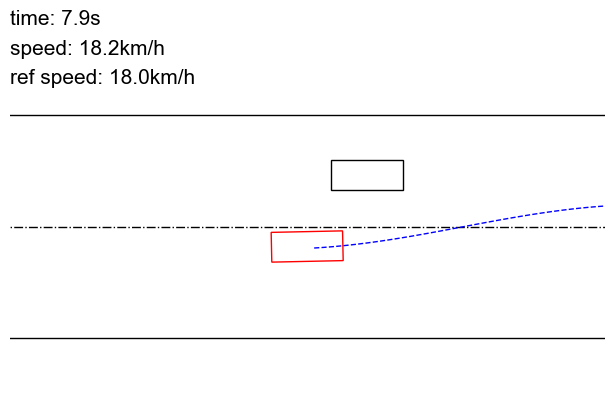

0.00023245811


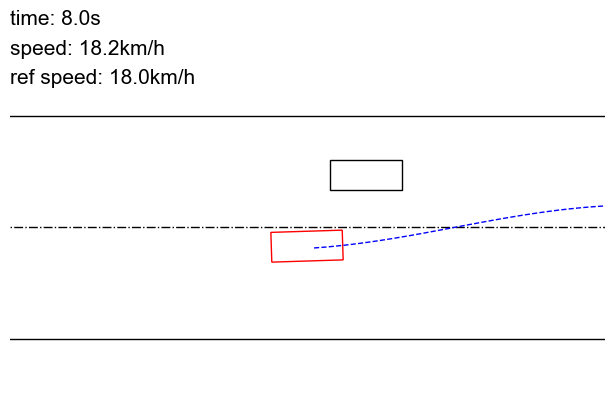

0.00023543835


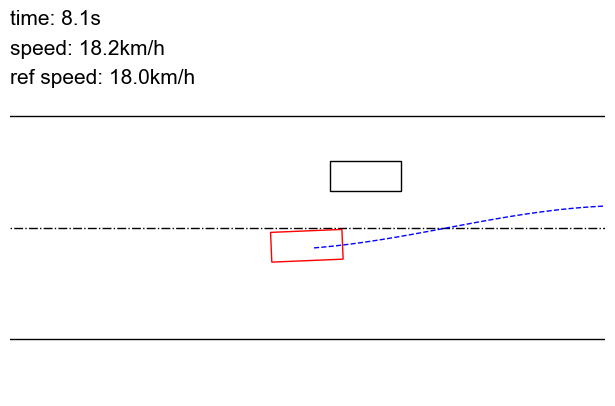

0.00023841858


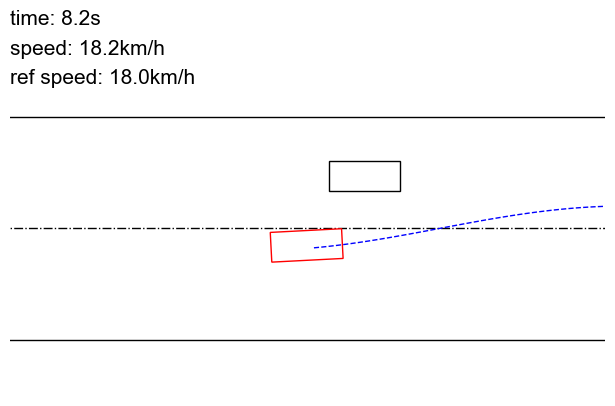

0.00024288893


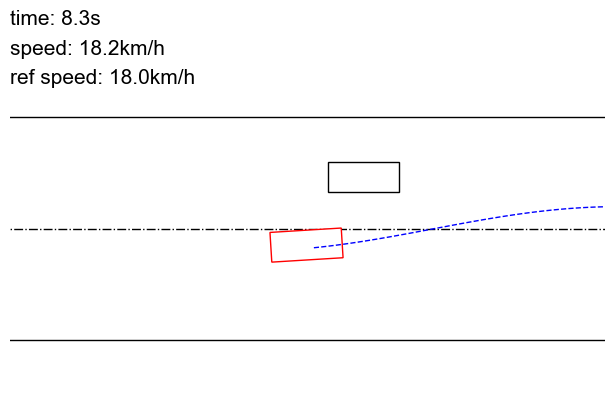

0.0002488494


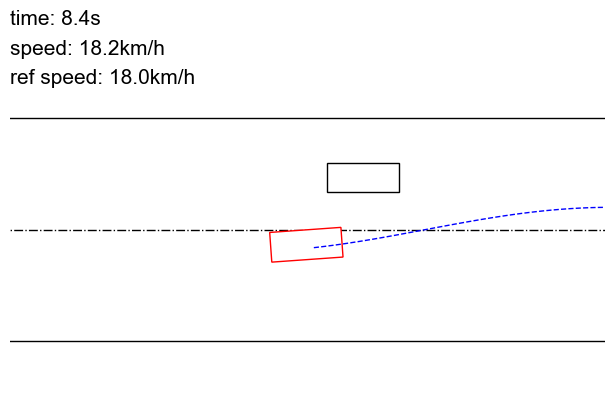

0.00025629997


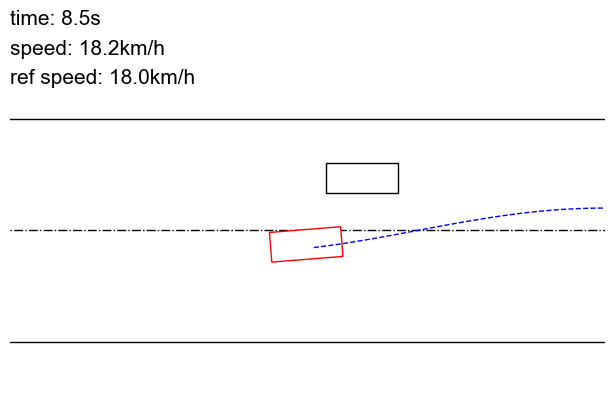

0.0002682209


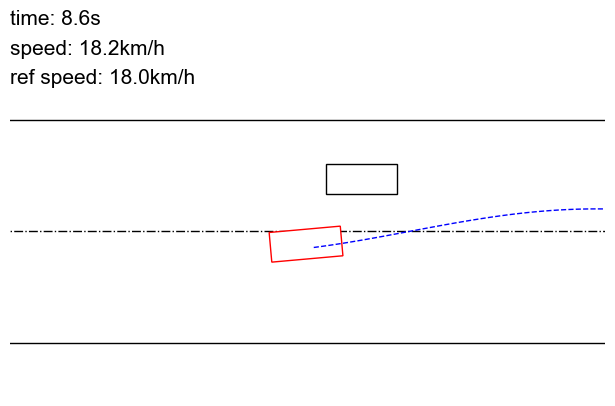

0.00028461218


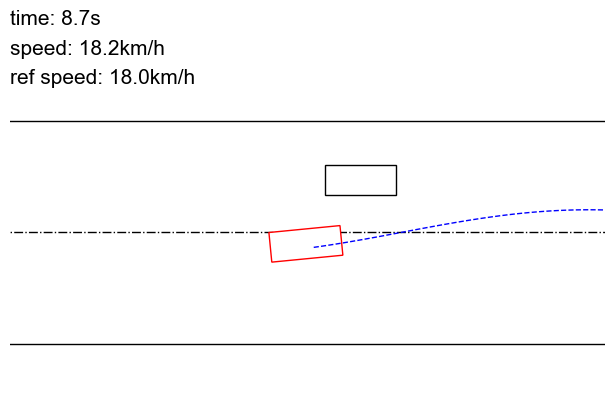

0.00030845404


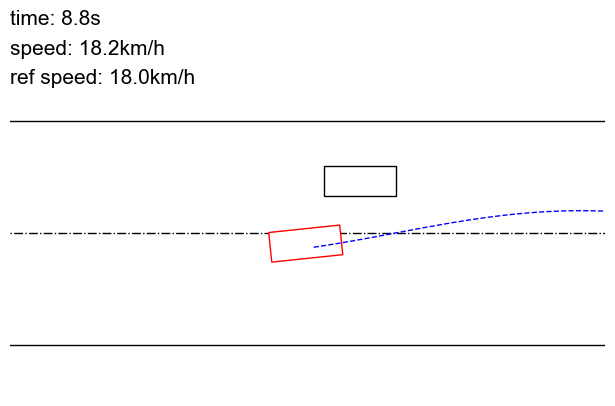

0.00034421682


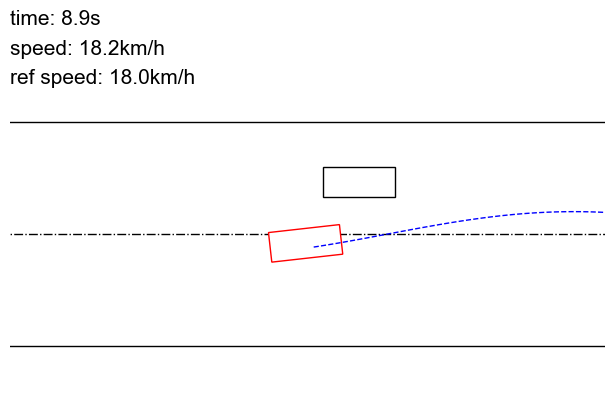

0.0003963709


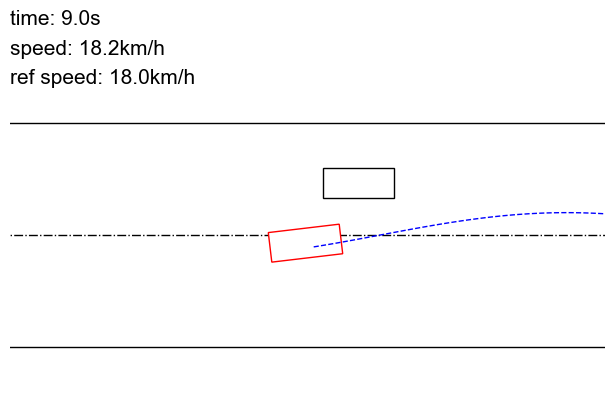

0.00046044588


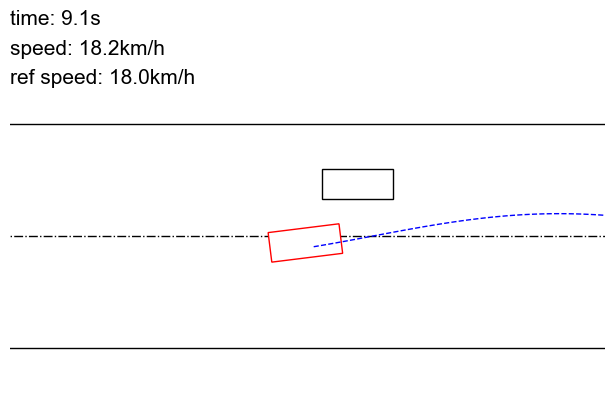

0.0005275011


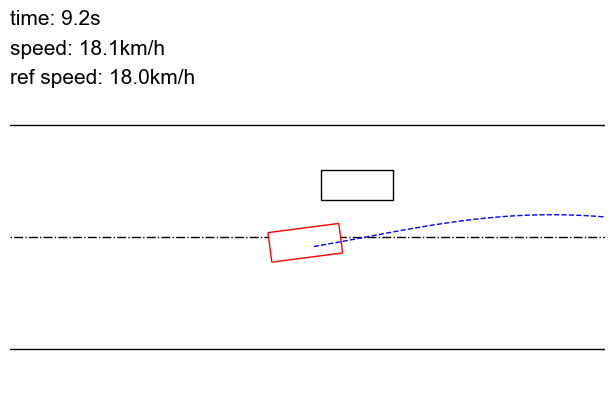

0.00058561563


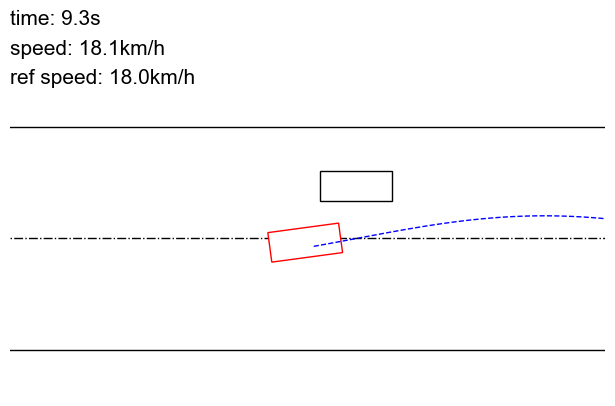

0.00062435865


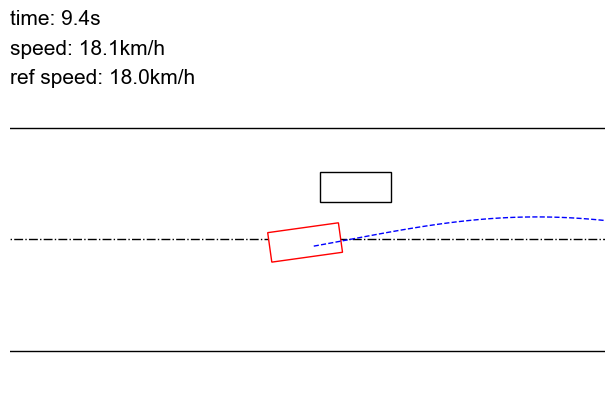

0.0006467104


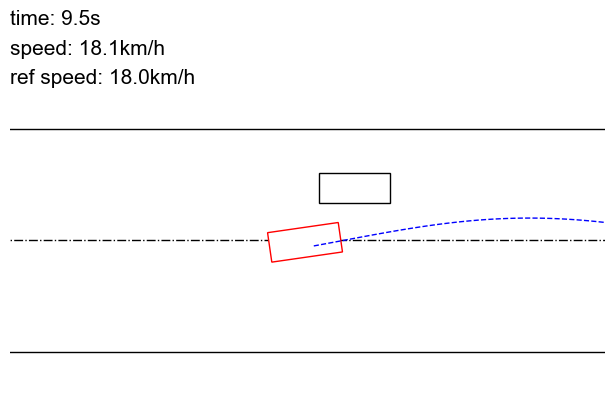

0.00066161156


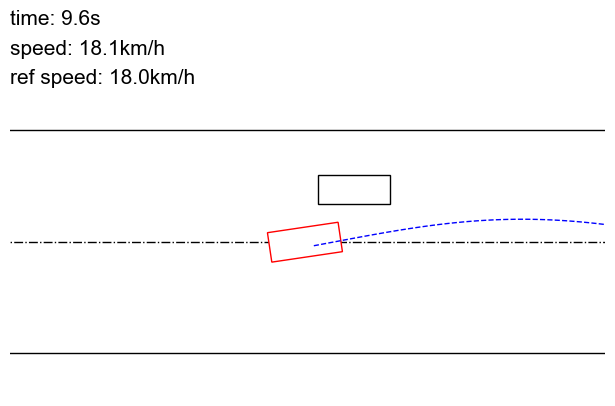

0.00067204237


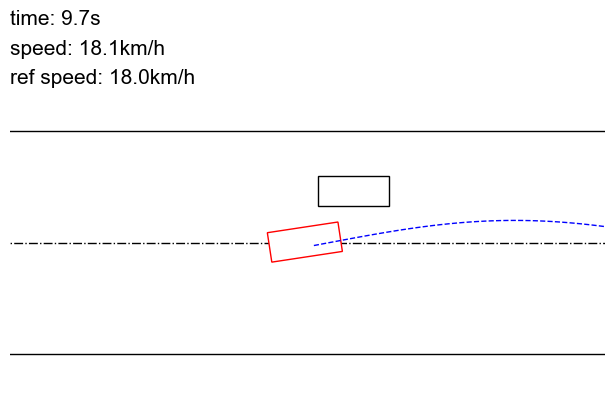

0.00068098307


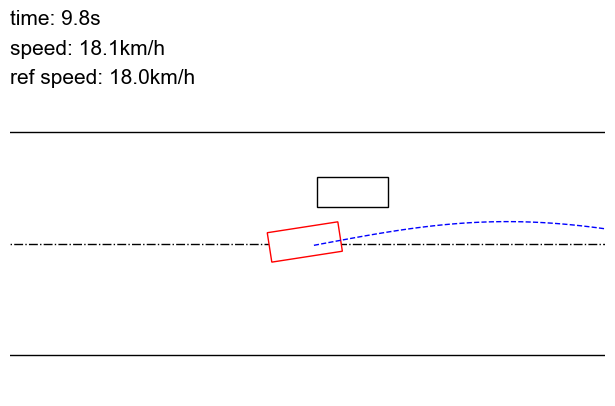

0.0006914139


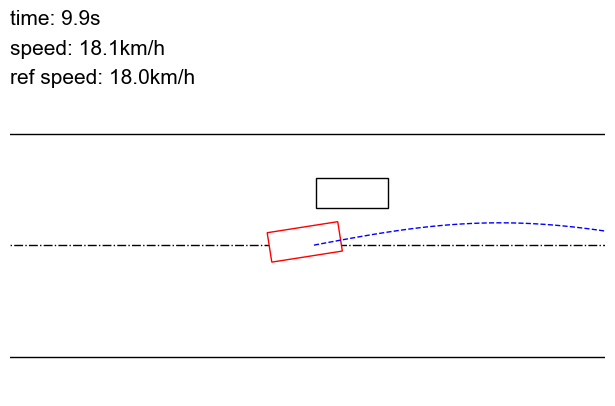

0.0007033348


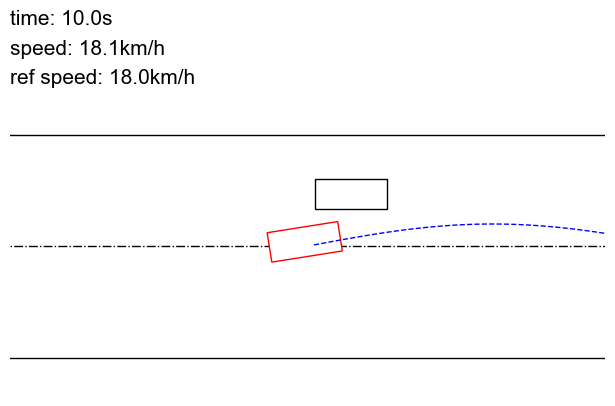

0.00071823597


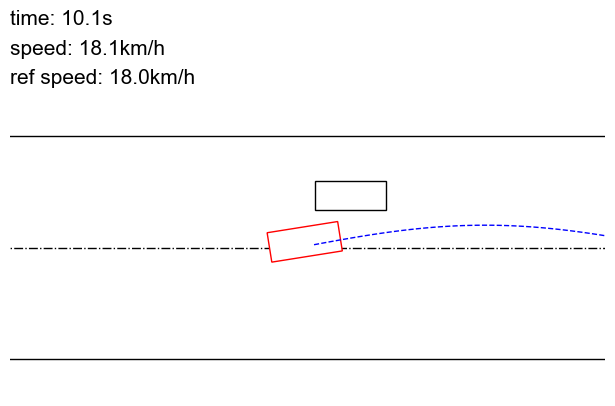

0.0007376075


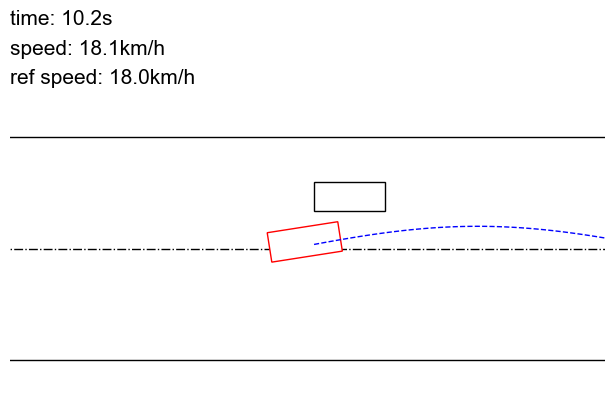

0.0007688999


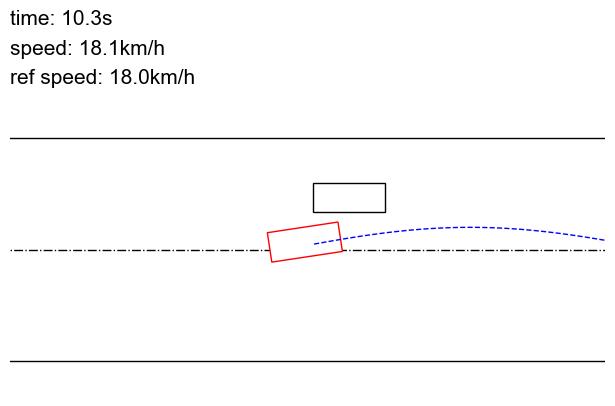

0.0008240342


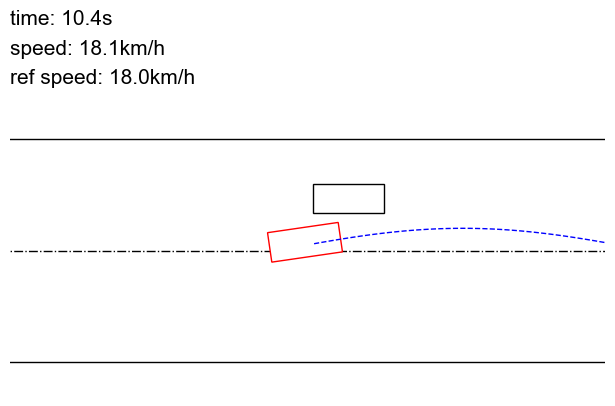

0.00094771385


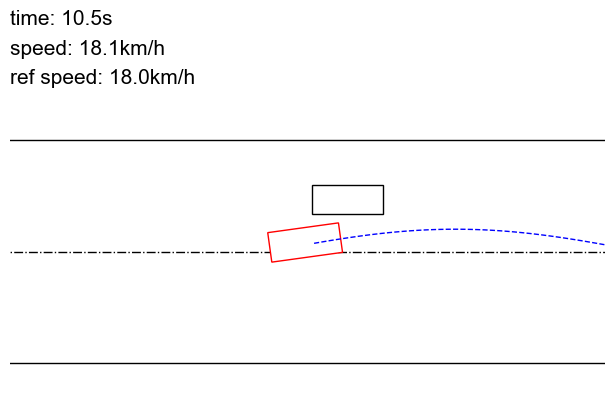

0.001271069


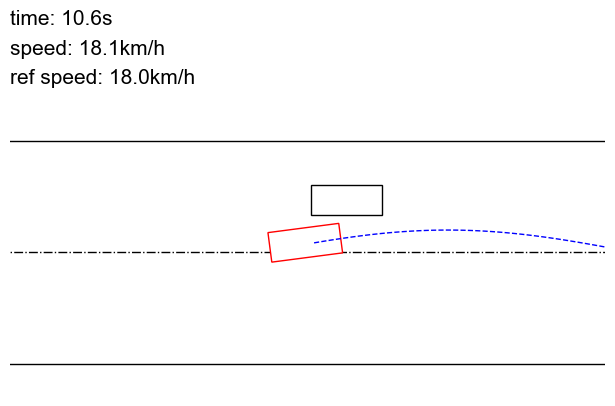

0.0023320317


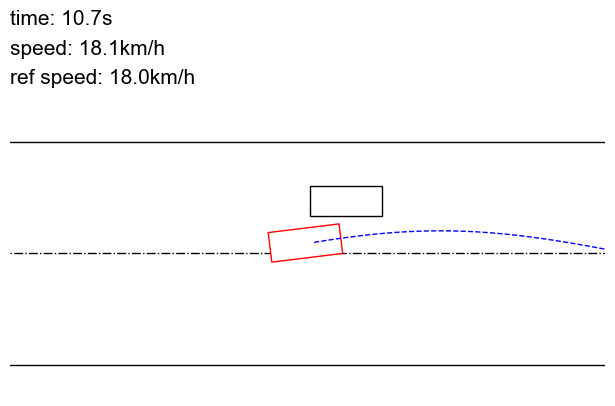

0.009210408


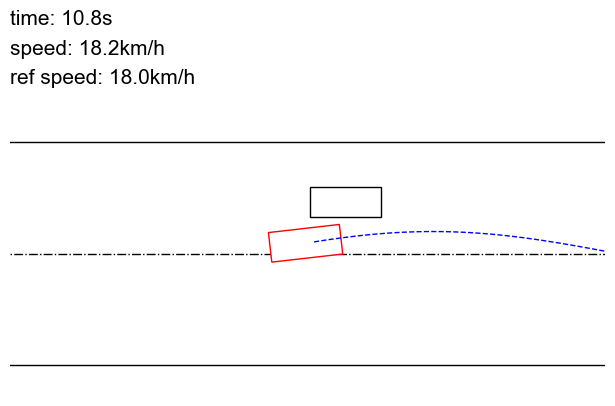

0.116211176


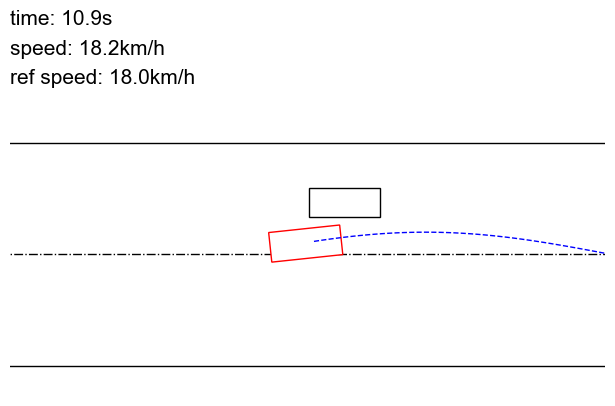

2.292922


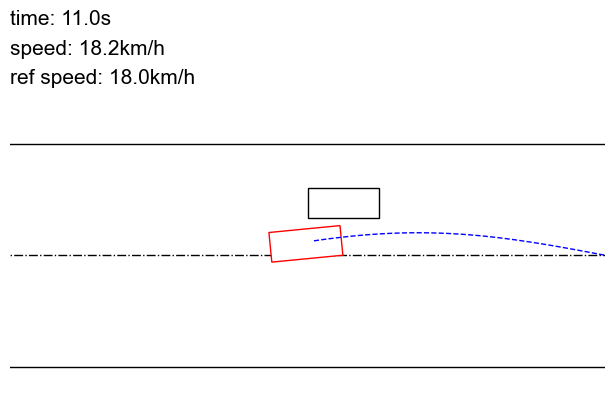

16.241364


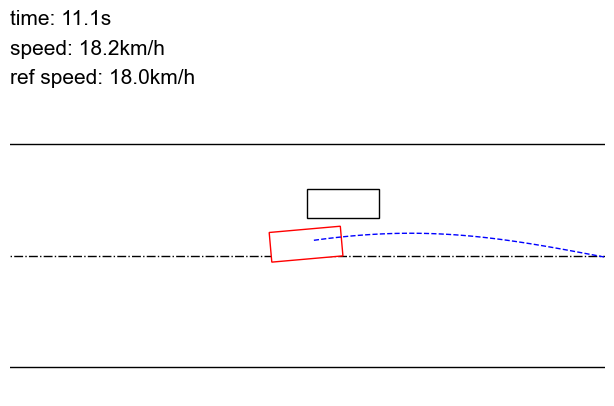

32.509876


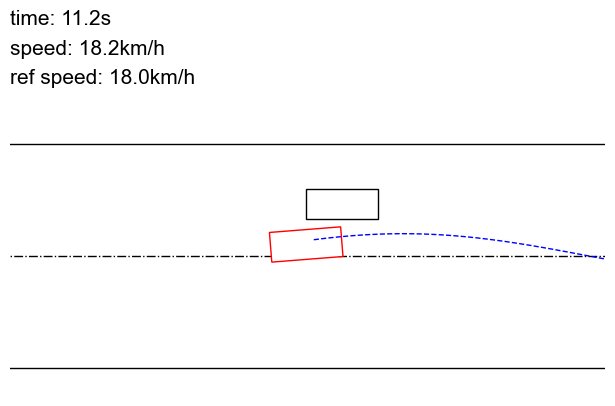

33.96213


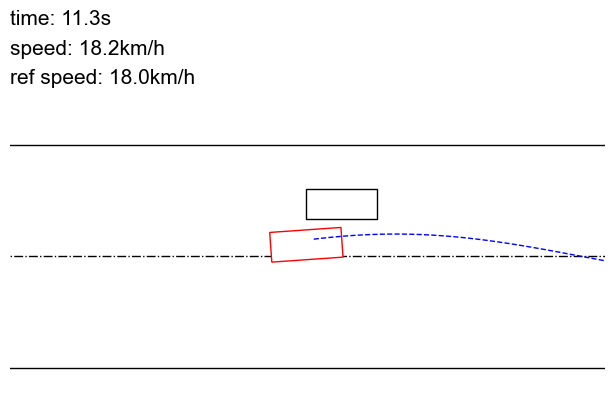

22.234865


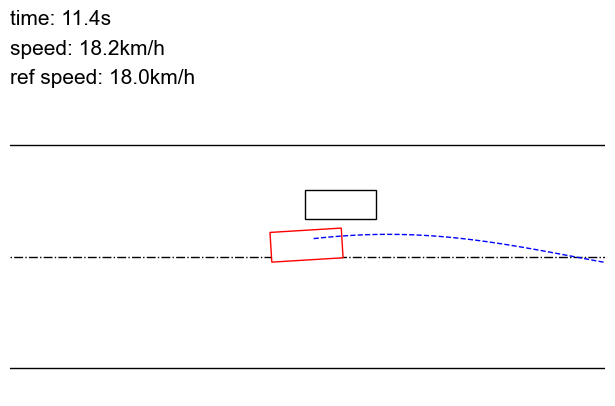

9.600735


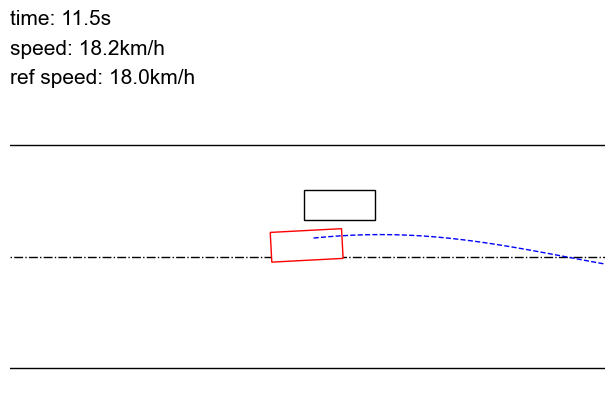

2.1264062


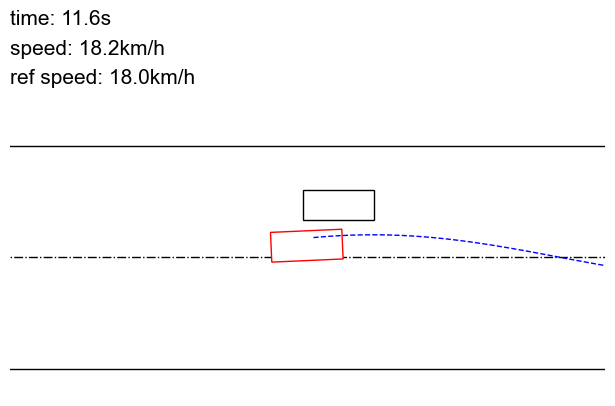

0.30577332


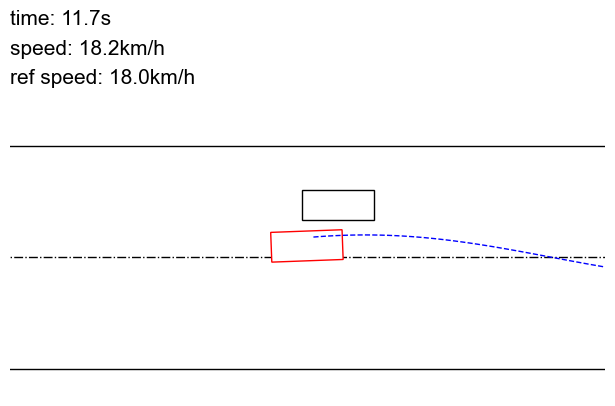

0.043305755


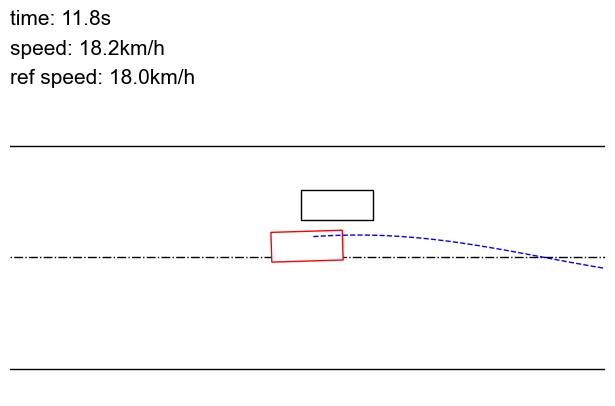

0.012730062


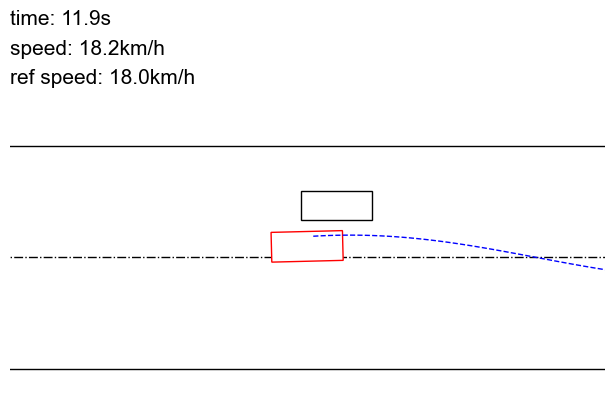

0.007431209


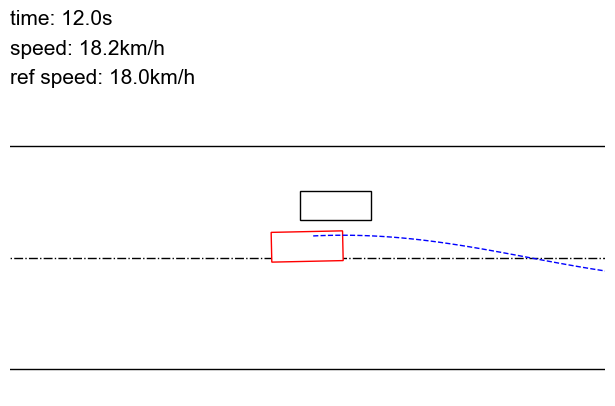

0.0054195523


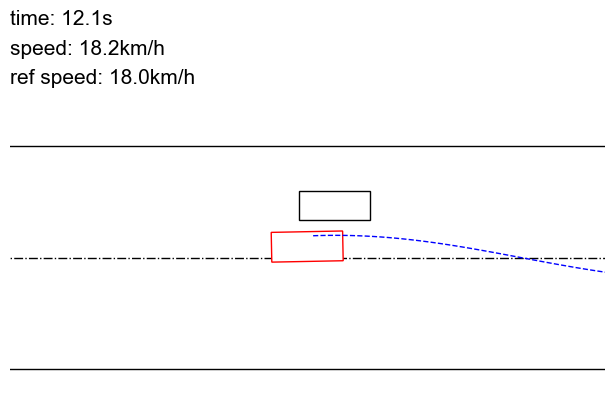

0.004413724


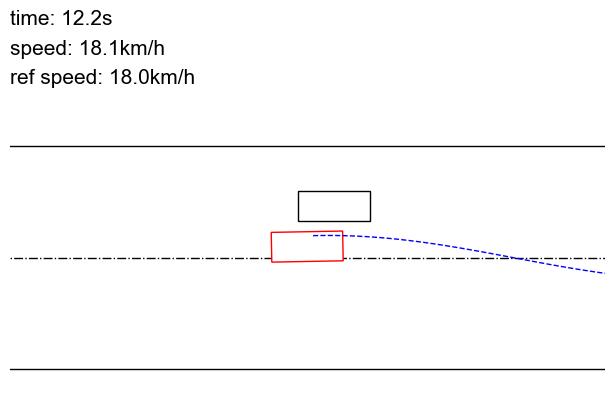

0.0037893653


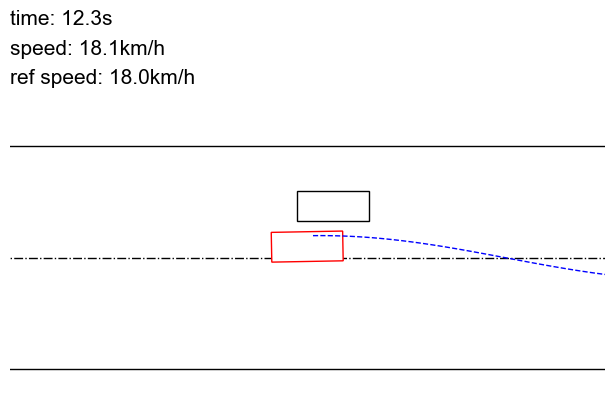

0.0032797456


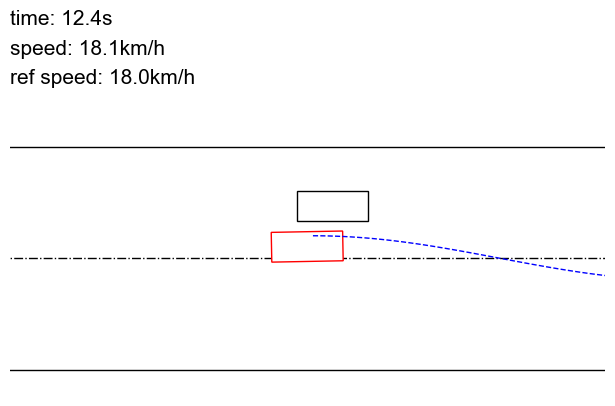

0.0027552247


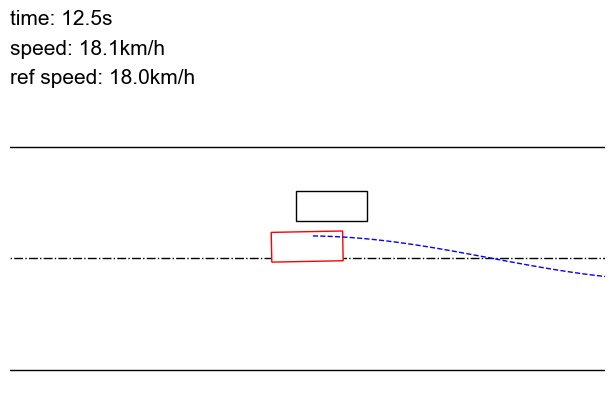

0.0023767352


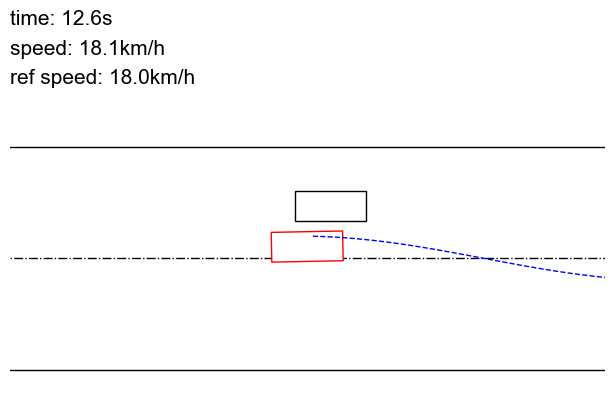

0.0021472573


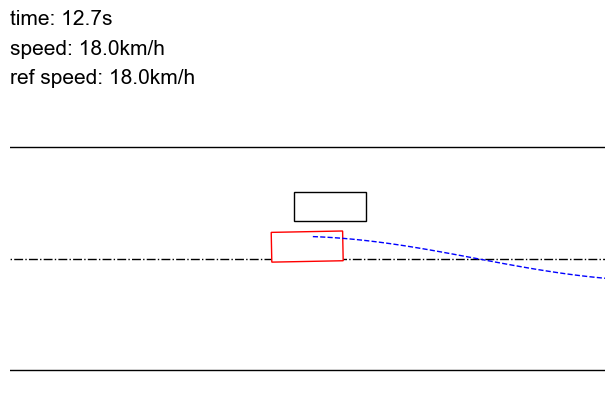

0.0024065375


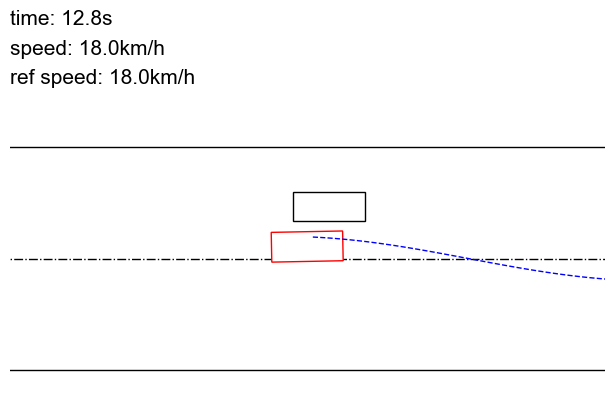

0.0032961369


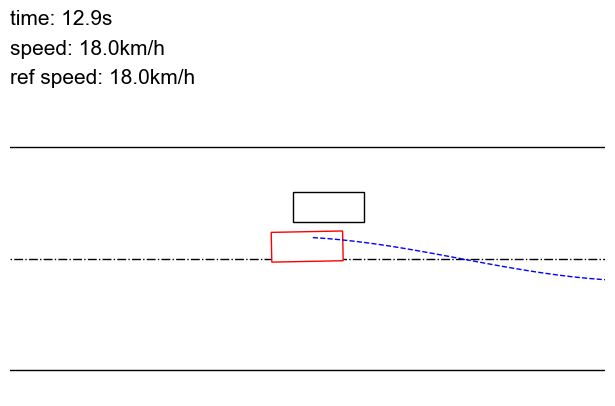

0.0047817826


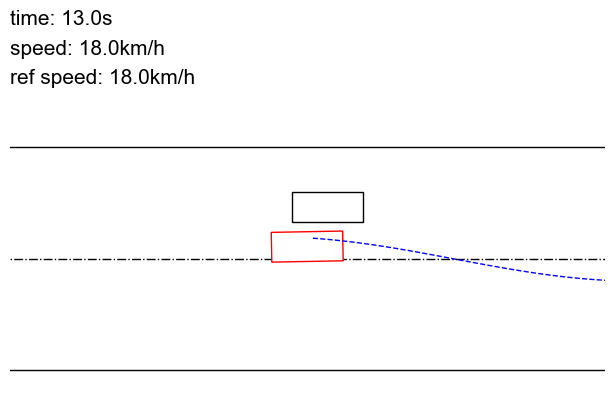

0.012409687


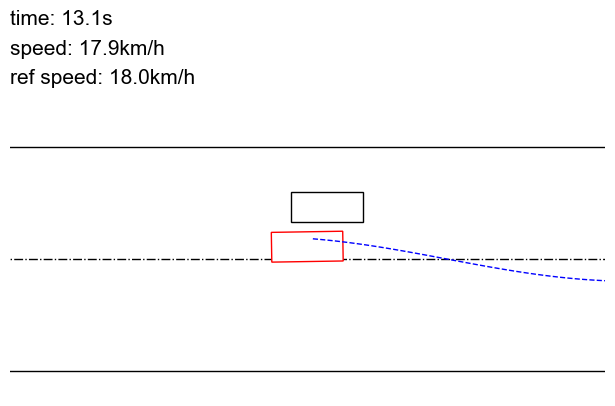

0.032366812


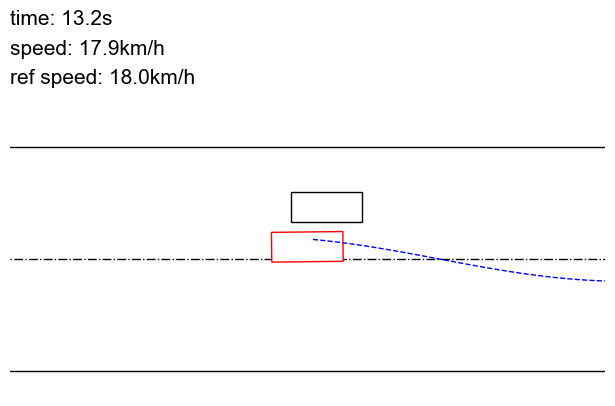

0.04737377


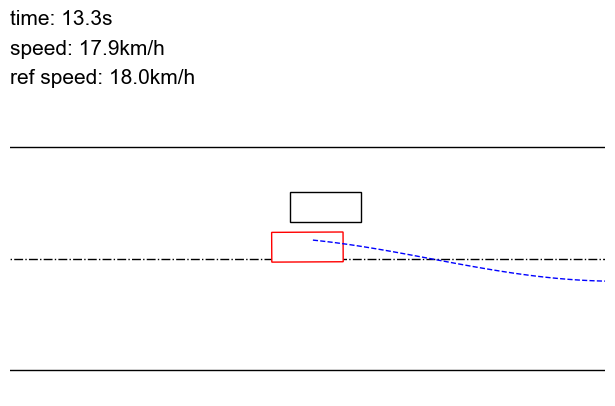

0.032389164


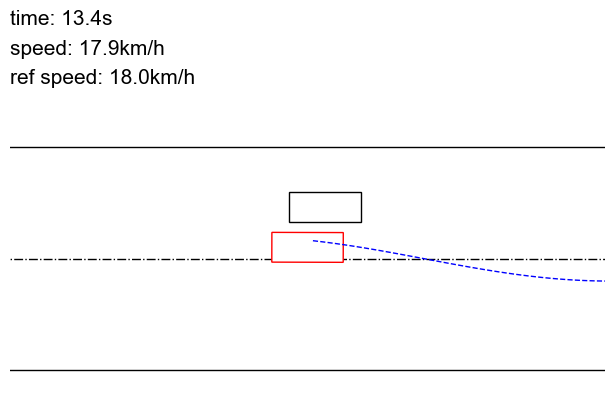

0.017257035


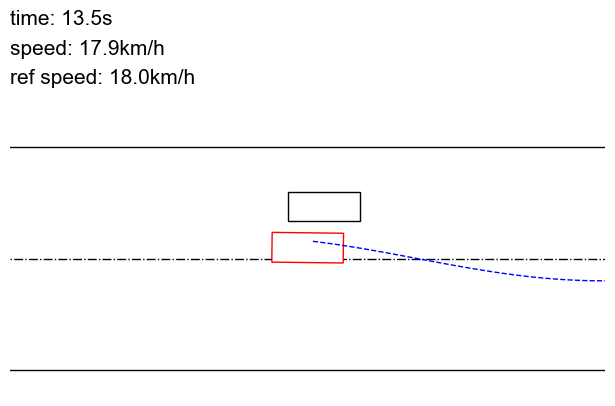

0.009934604


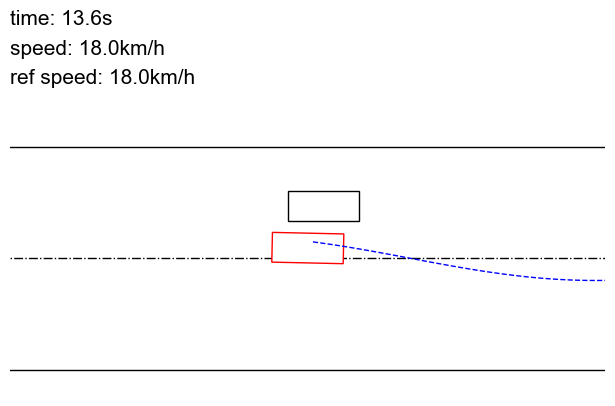

0.004900992


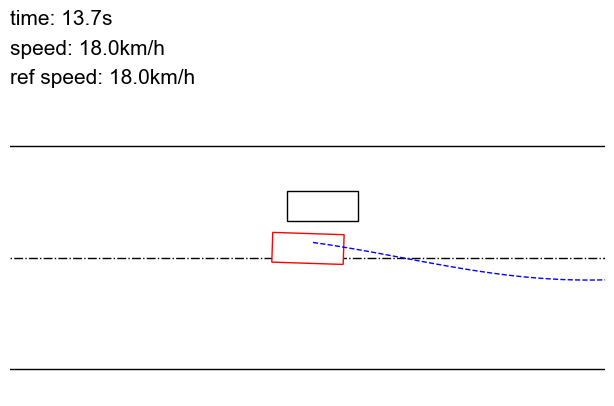

0.0027060509


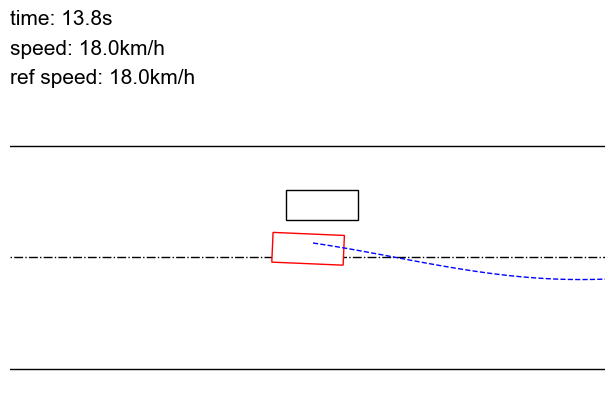

0.001873076


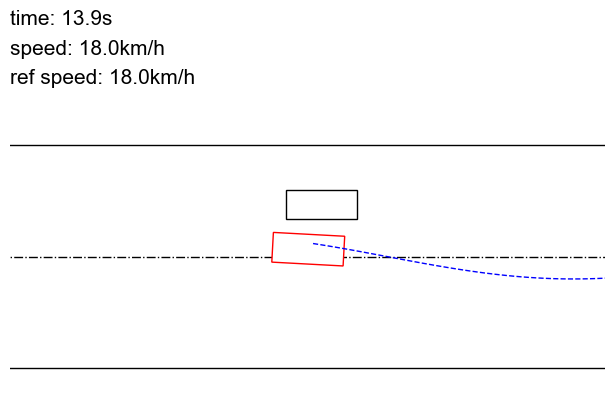

0.0013694167


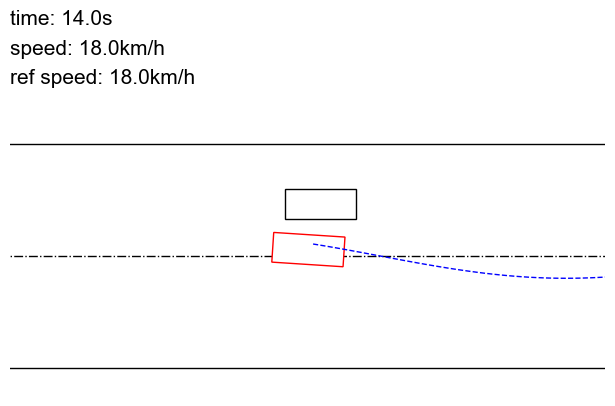

0.0011026859


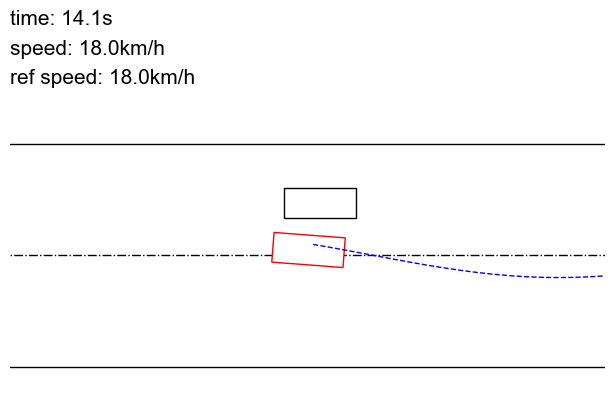

0.0009328127


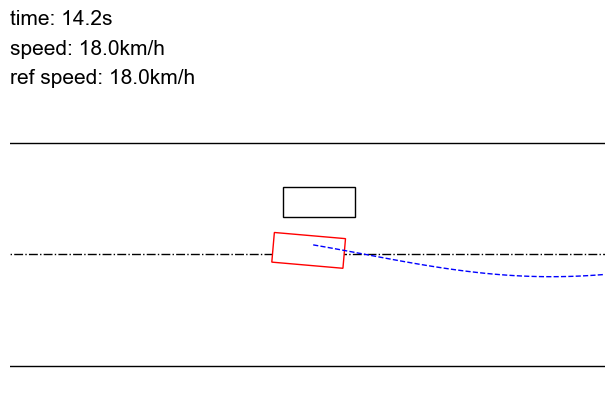

0.0008478761


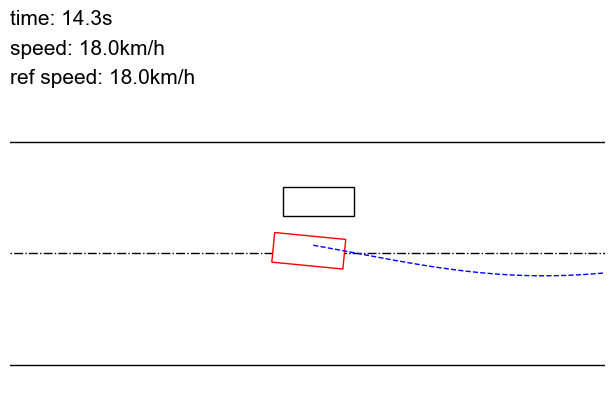

0.00079870224


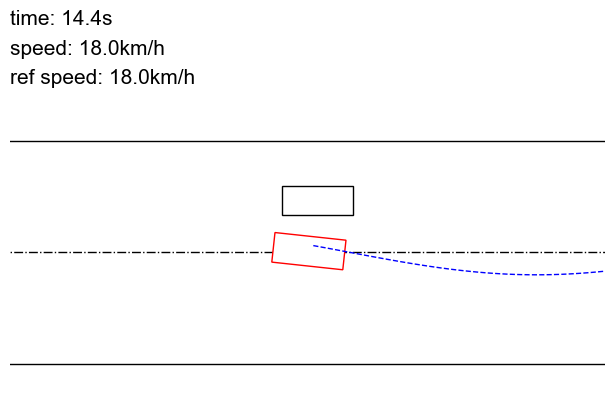

0.0007674098


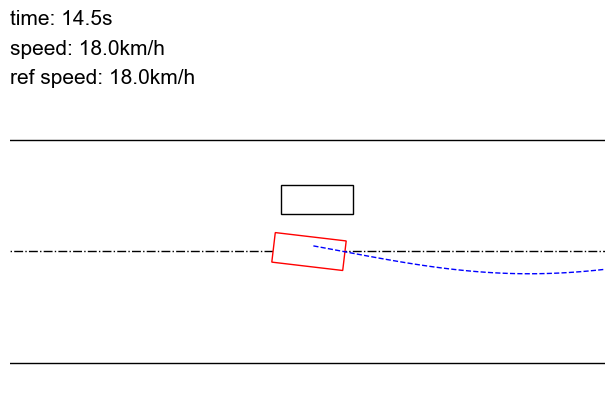

0.00074505806


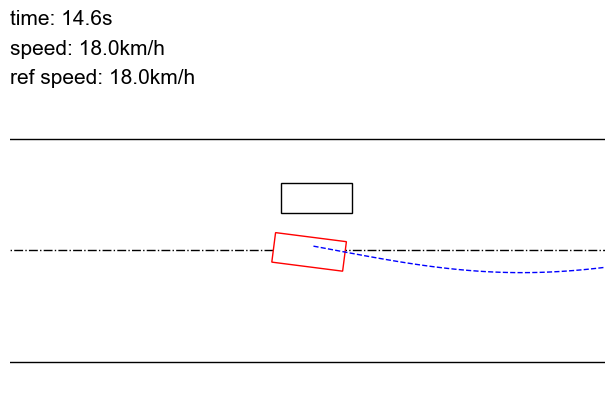

0.0007286668


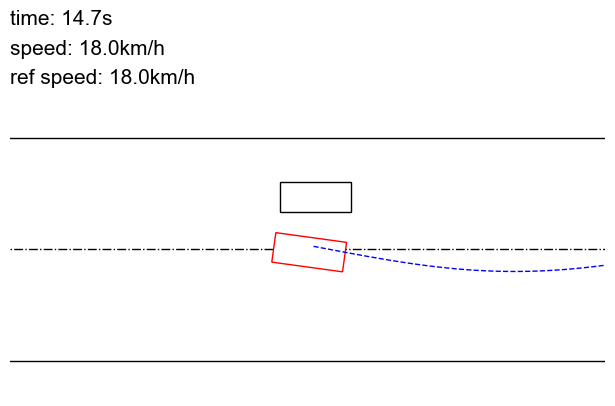

0.00071674585


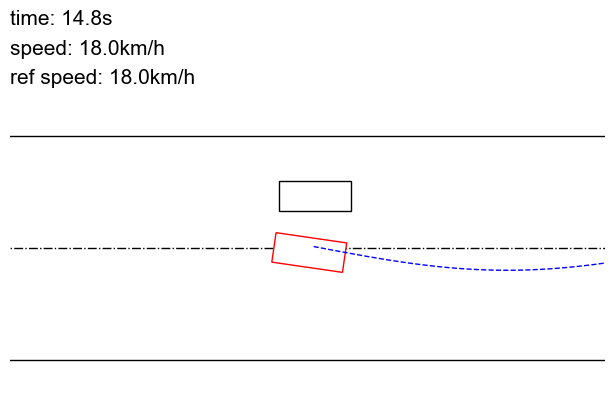

0.0007048249


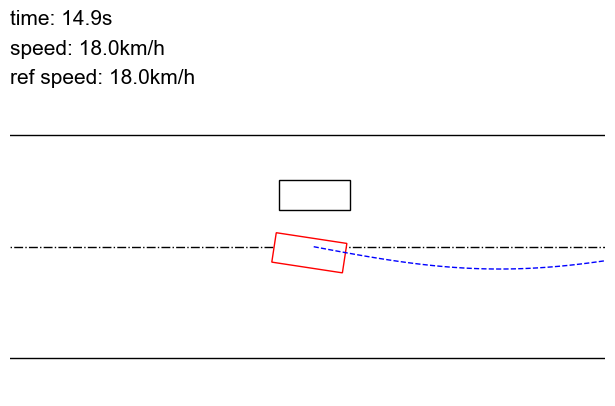

0.0006943941


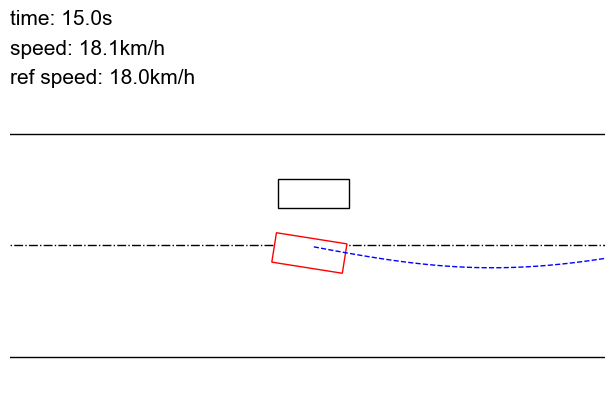

0.0006854534


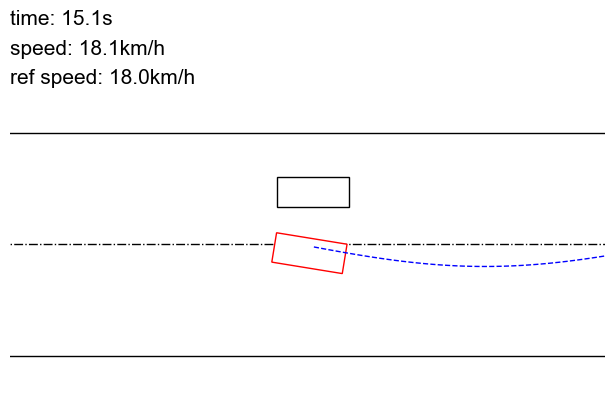

0.00067800283


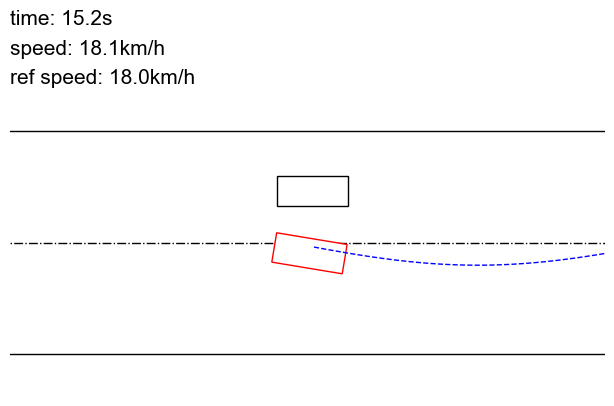

0.00066906214


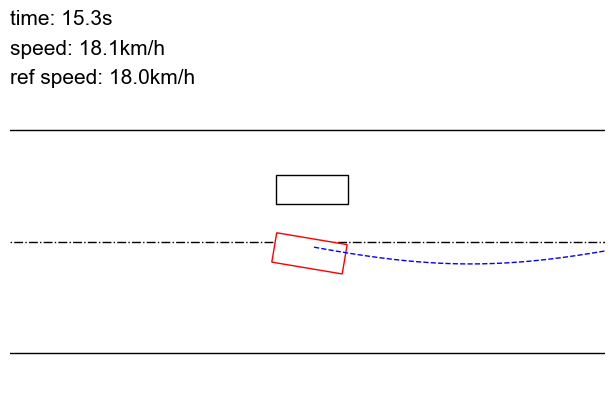

0.00066012144


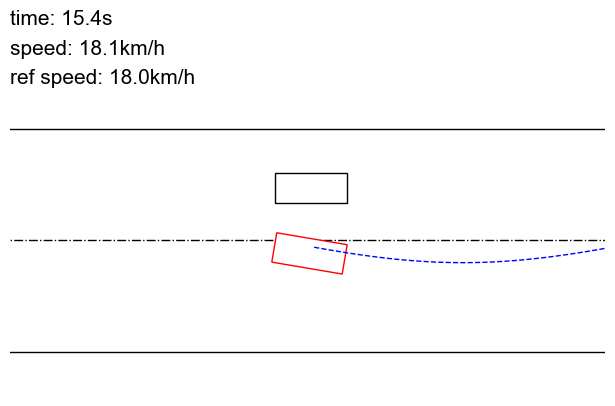

0.0006467104


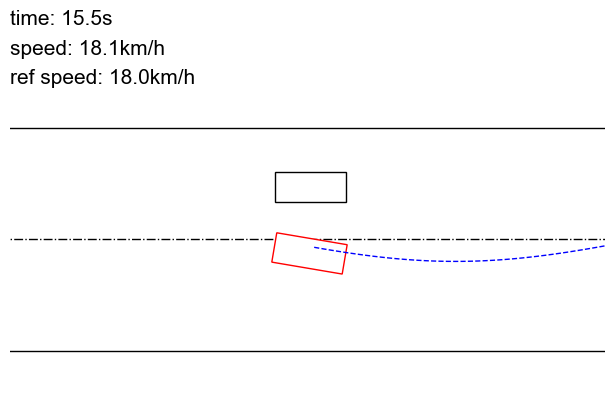

0.00062584877


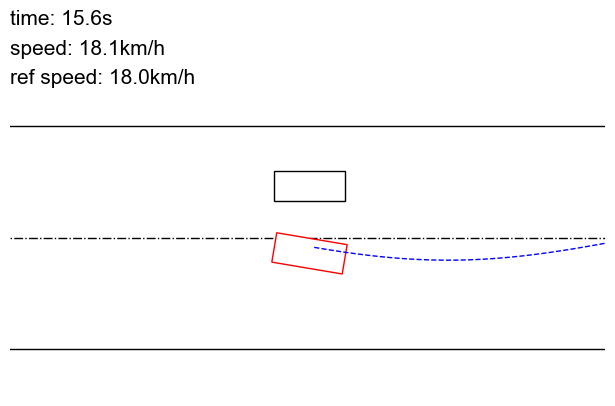

0.00059455633


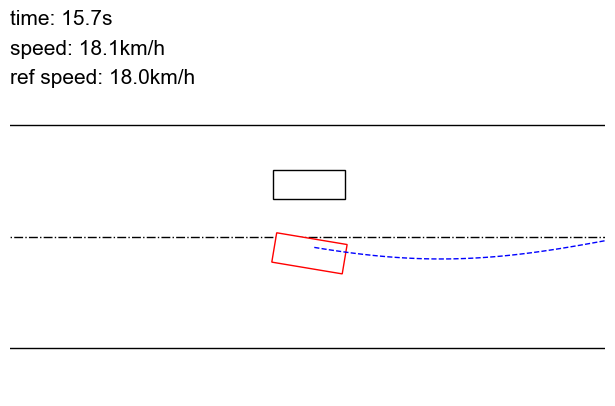

0.0005468726


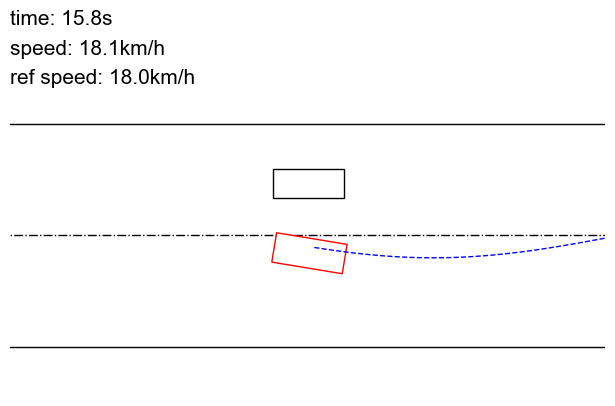

0.00048726797


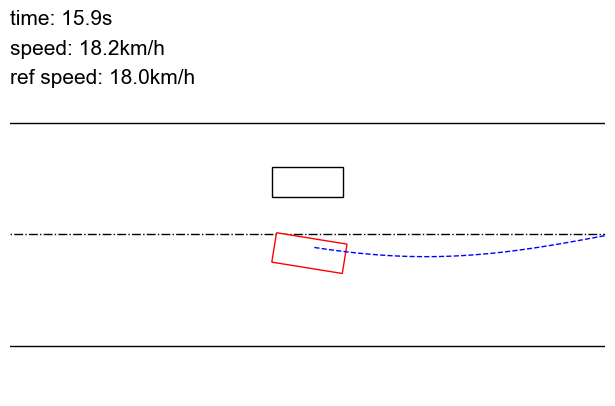

0.00042319298


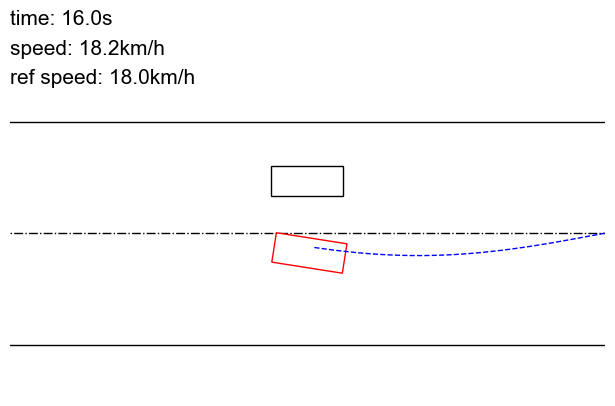

0.0003695488


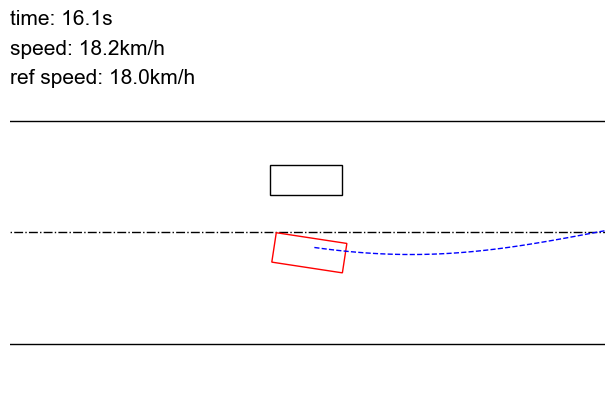

0.00032782555


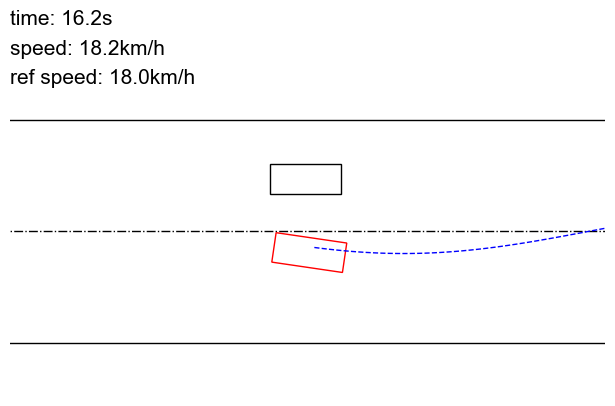

0.00029951334


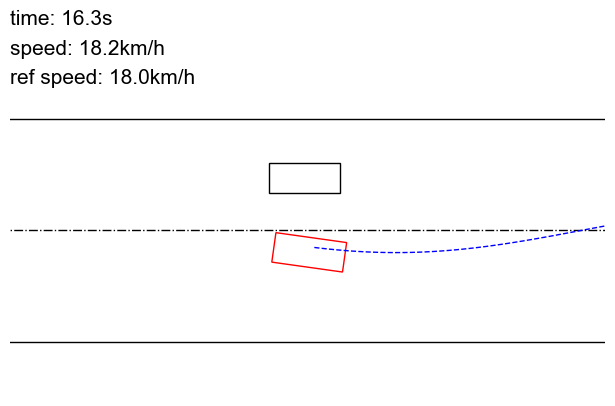

0.0002786517


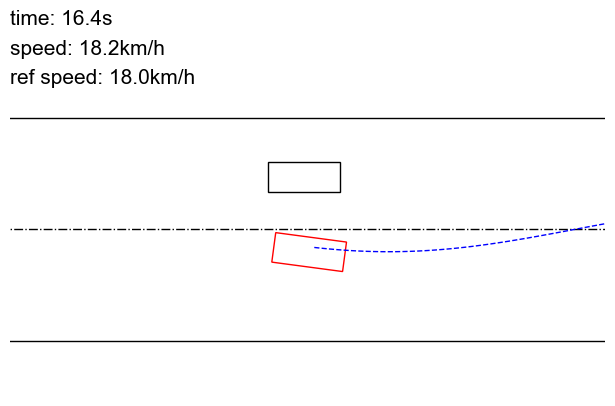

0.00026524067


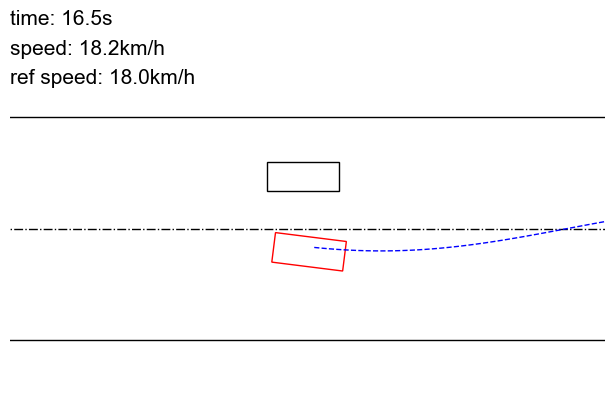

0.00025629997


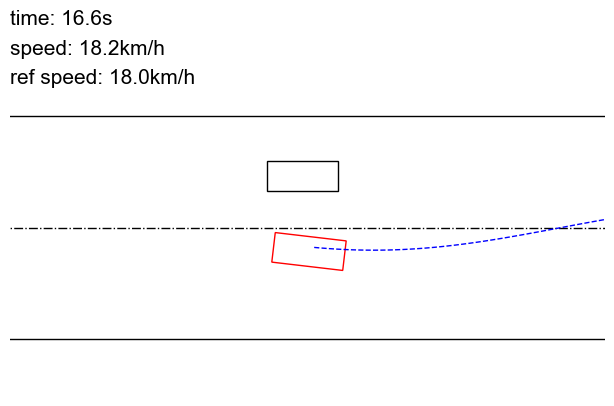

0.0002503395


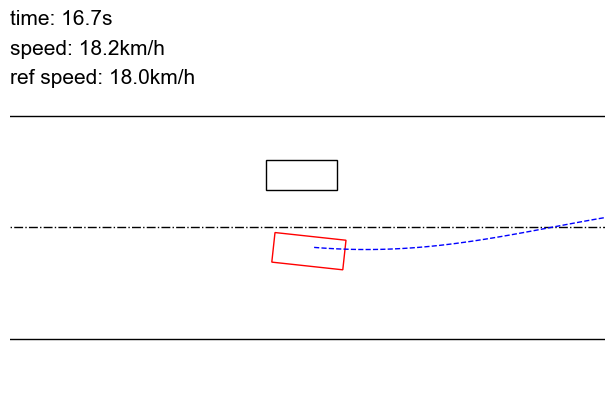

0.00024437904


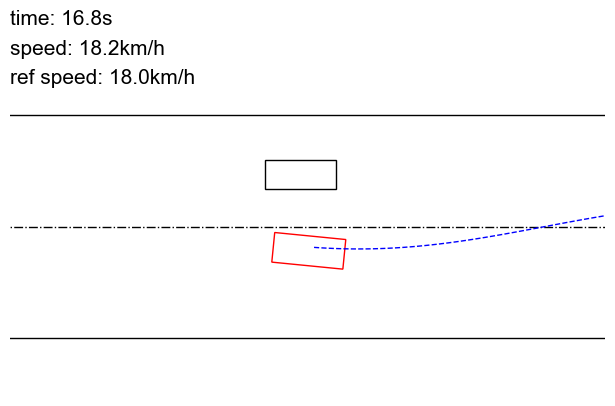

0.00024139881


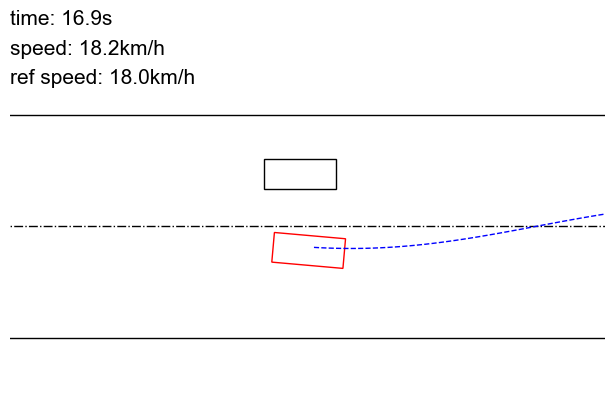

0.00023841858


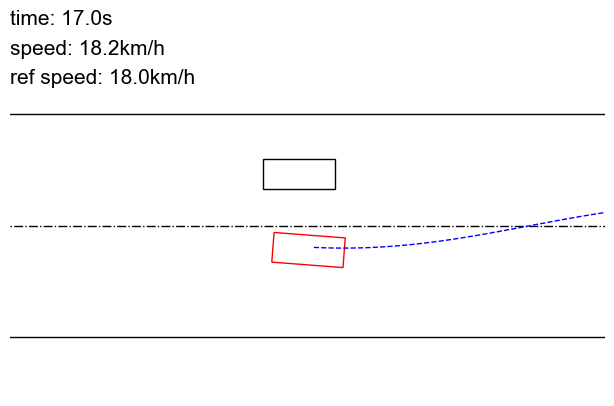

0.00023692846


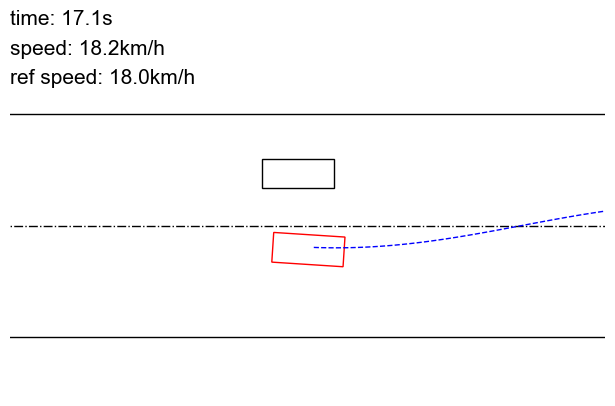

0.00023394823


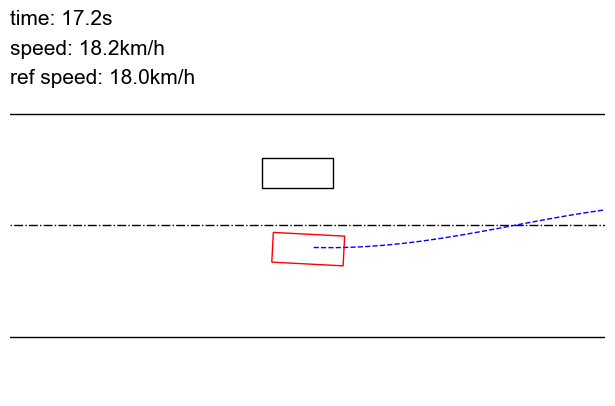

0.00023394823


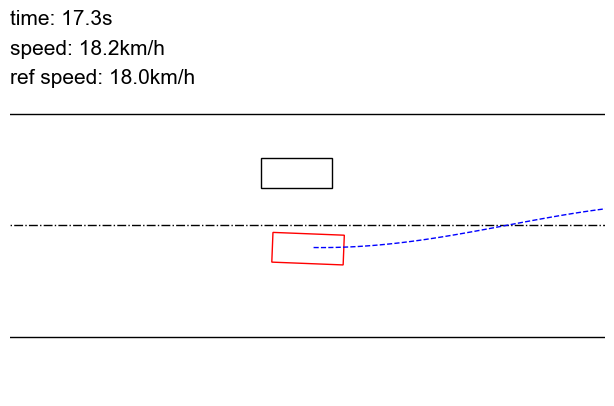

0.00023245811


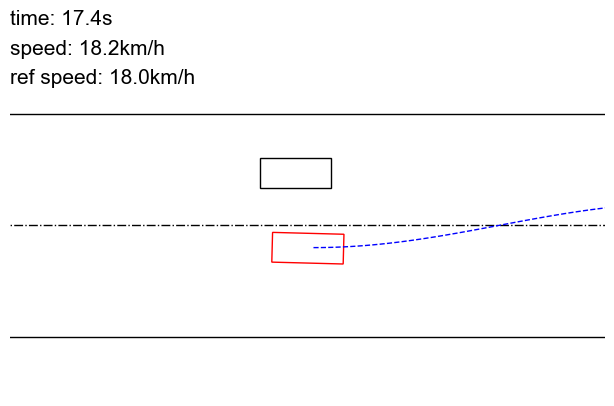

0.00023245811


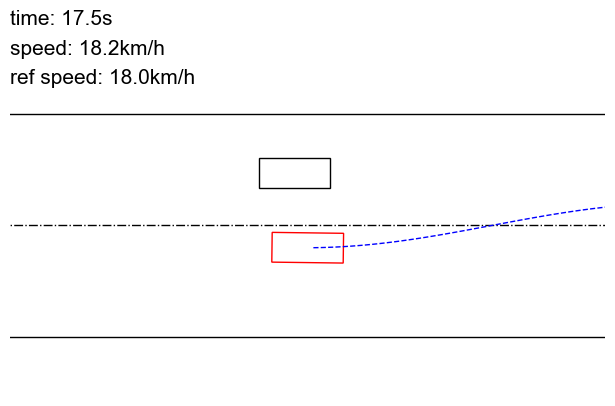

0.00023245811


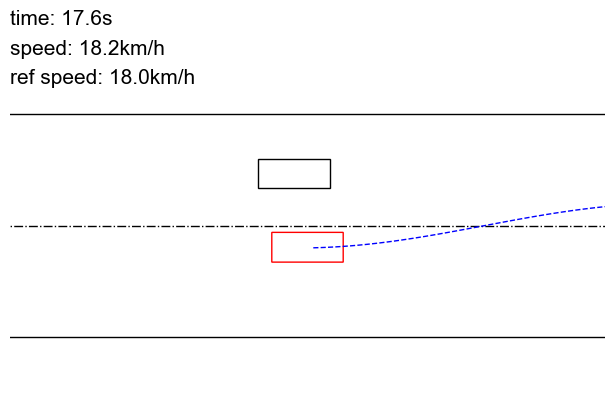

0.00023245811


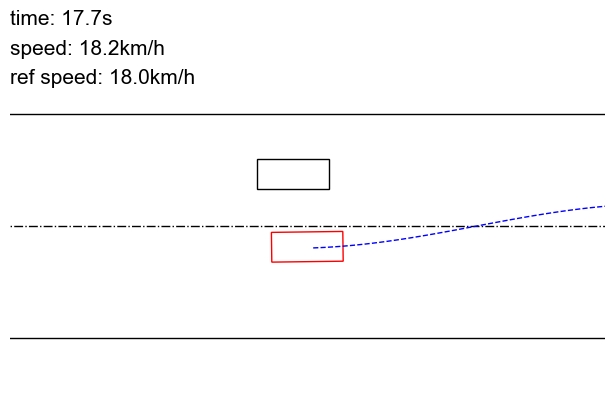

0.00023394823


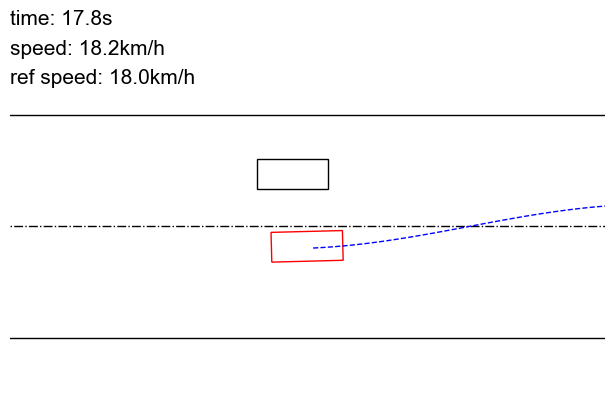

0.00023543835


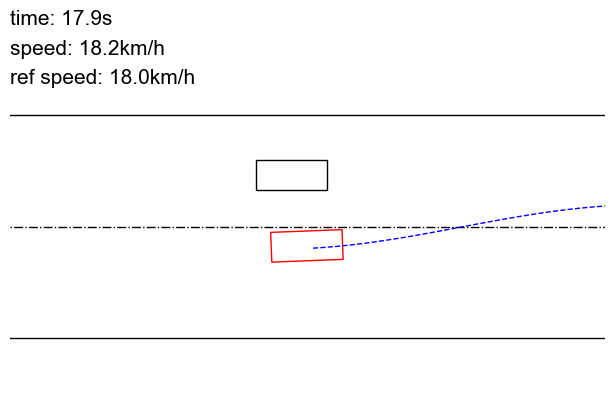

0.00023692846


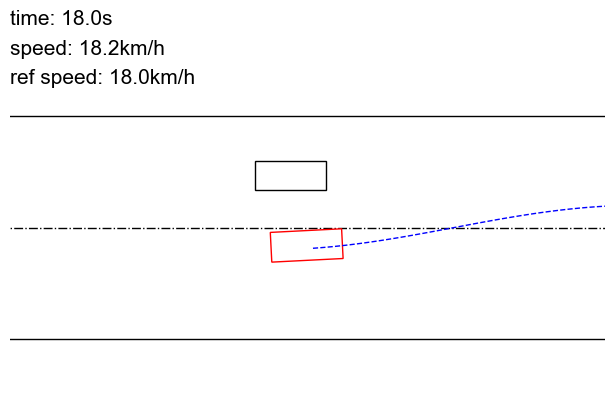

0.00023841858


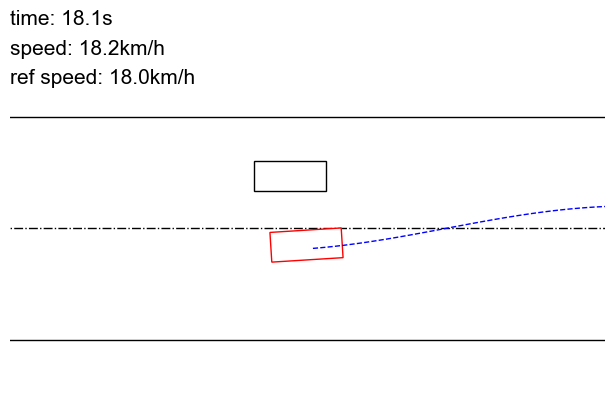

0.00024139881


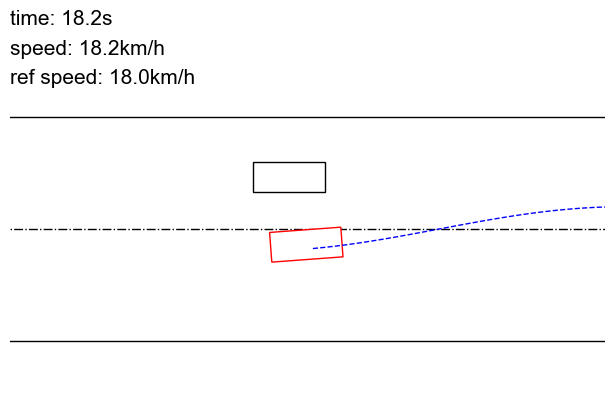

0.00024586916


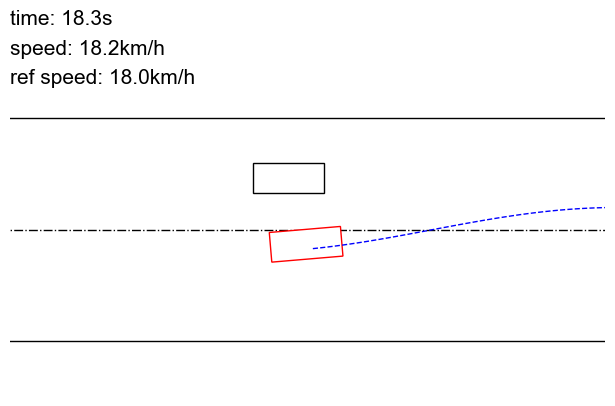

0.0002503395


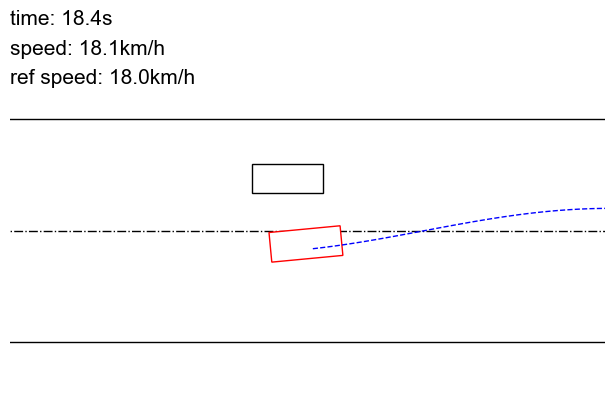

0.00025629997


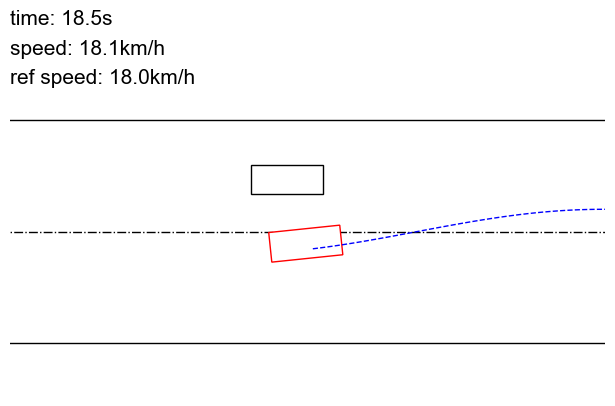

0.00026524067


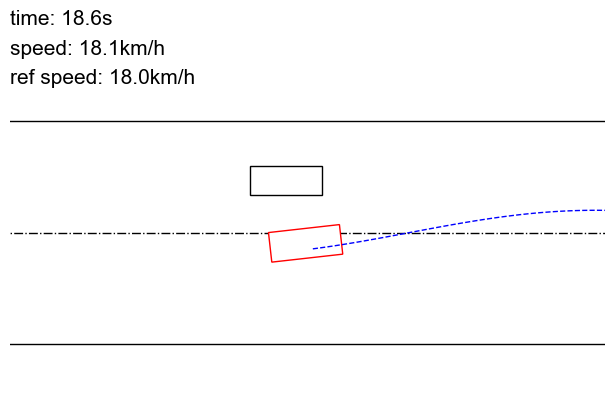

0.0002771616


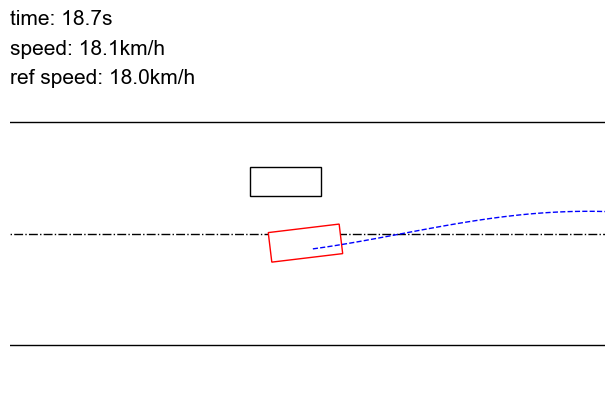

0.00029802322


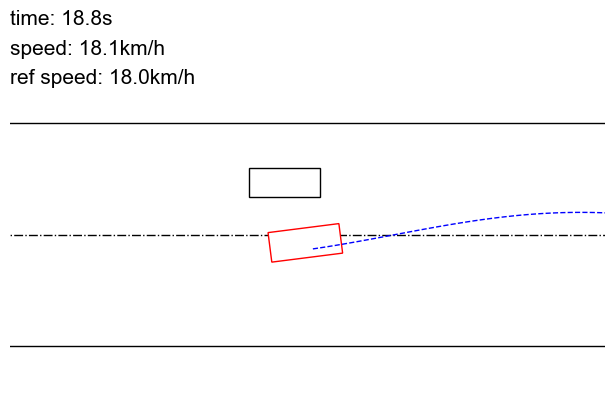

0.0003248453


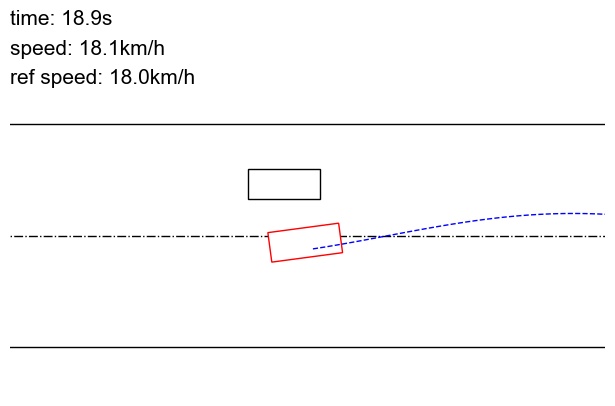

0.00036507845


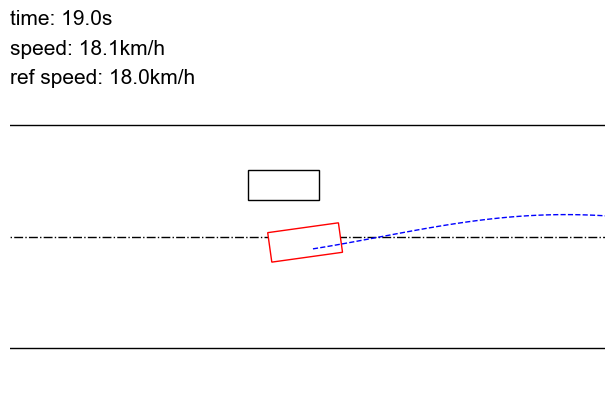

0.0004172325


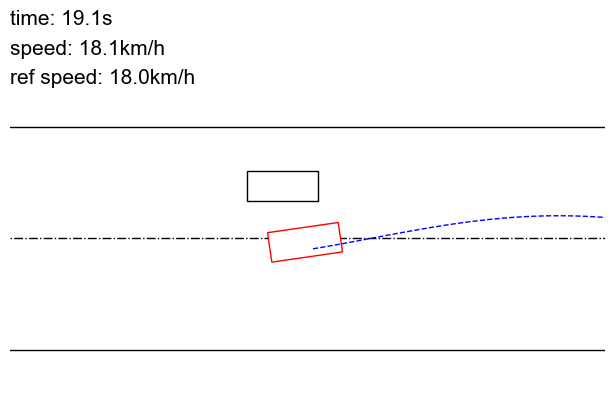

0.0004813075


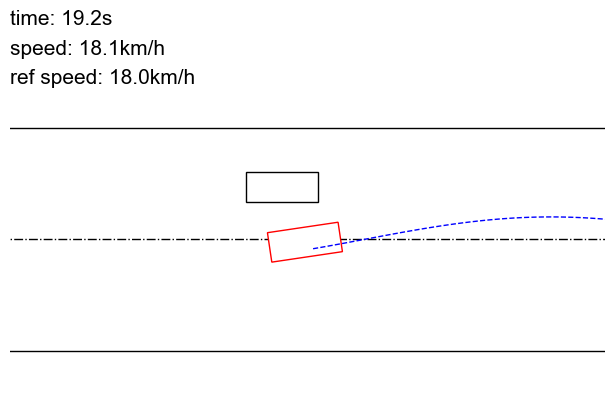

0.0005453825


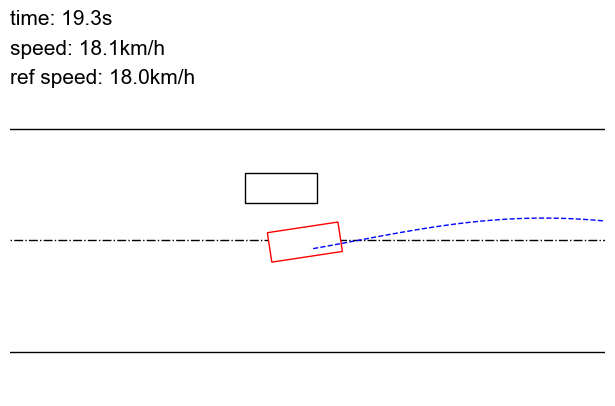

0.0005930662


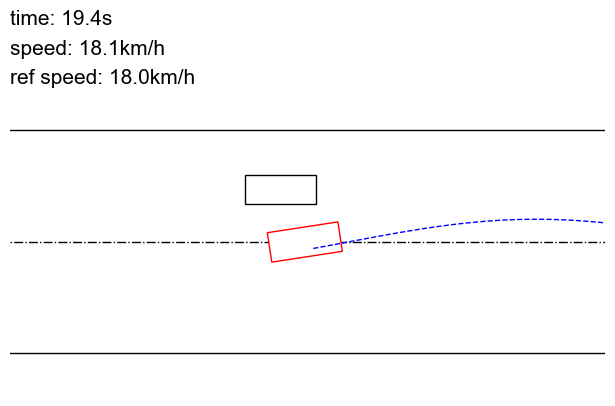

0.00062584877


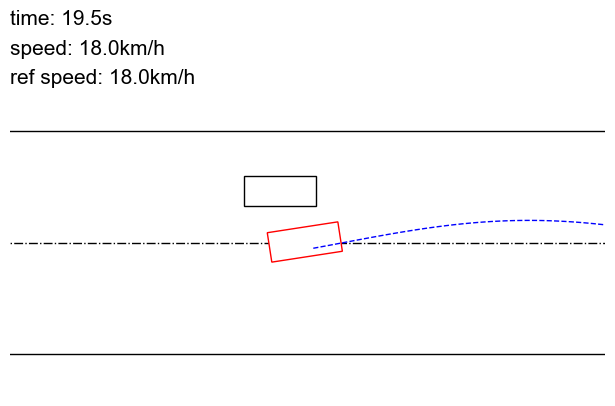

0.0006467104


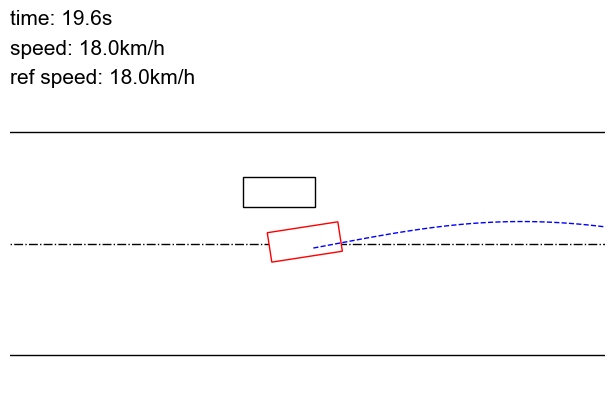

0.00066012144


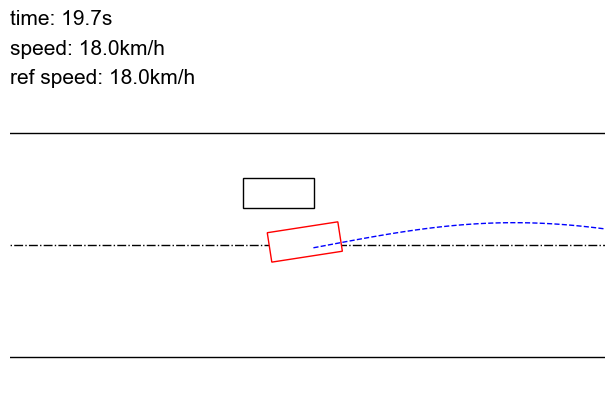

0.00067055225


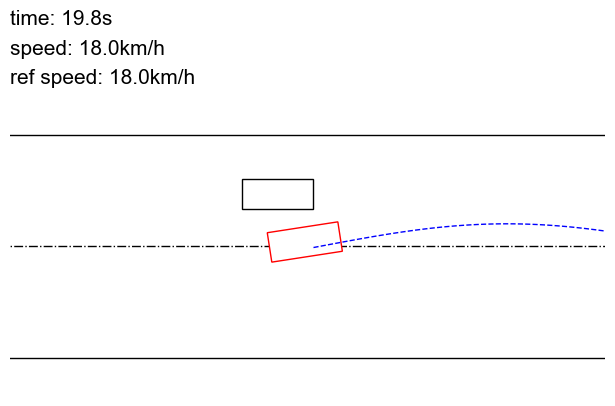

0.00067800283


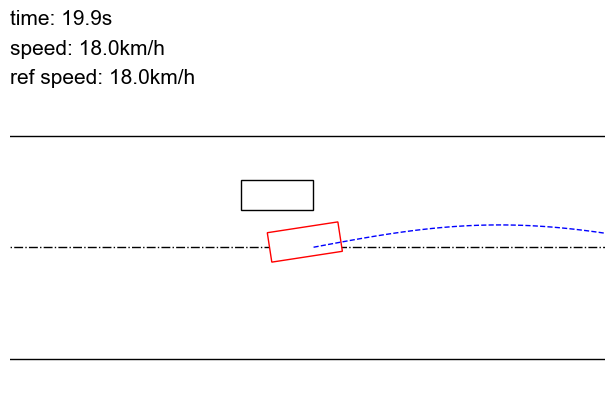

0.00068694353


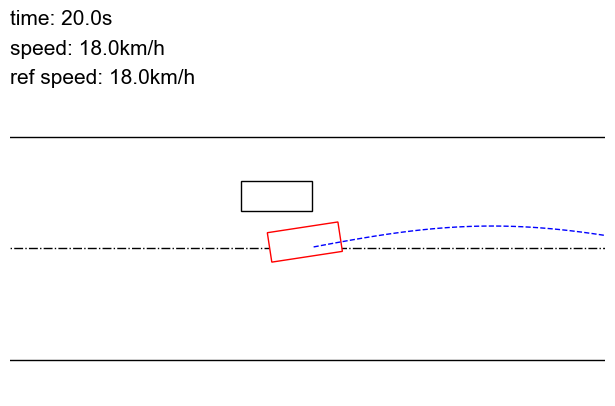

[21:03:04] test length mean: 200.0
[21:03:04] test return mean: -2.356297731399536


In [2]:
env_name = "tracking"
log_dir = "02-25-23_15.27.08_DRPO_22" # fill in this
epoch = 314 # fill in this

# load cfg from the trained model
cfg = Config()

assert env_name == "tracking", 'This file is only for tracking env'
assert log_dir is not None, 'Must specify --run-dir'
run_dir = LOGS_DIR / log_dir
assert run_dir.is_dir(), f'Run directory does not exist: {run_dir}'

with (run_dir / 'config.json').open('r') as f:
    saved_cfg = json.load(f)
    assert env_name == saved_cfg["env_name"]
    cfg.update(saved_cfg)

cfg.alg_cfg.update(dict(mode='test'))
cfg.env_cfg.update(dict(render=True))

# Ensure all required arguments have been set
cfg.verify()
for attr in ('env_name', 'seed'):
    assert hasattr(cfg, attr), f'Config must specify {attr}'

# load model and set env
time_now = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
test_log_dir = run_dir / 'test-{}'.format(time_now)
test_log_dir.mkdir(exist_ok=True, parents=True)

print(f'Test log directory: {test_log_dir}')

# initialize tester and run evaluation
tester = Tester(cfg, test_log_dir, epoch)
test_traj, info_traj = tester.run_evaluation(print_lam=True)

In [24]:
# get necessary data trajectories
traj_len = len(test_traj[0].get("actions"))
time_steps = np.arange(traj_len) * 0.1

surrs_states = np.array(info_traj[0]["surr_state"], dtype=np.float32)
states = np.array(info_traj[0]["state"], dtype=np.float32)
actions = np.array(test_traj[0].get("actions").cpu().numpy(), dtype=np.float32)
constraints = np.array(info_traj[0]["constraint_value"], dtype=np.float32)
video = np.array(info_traj[0]["img"], dtype=np.float32) / 255.0

ego_pos = states[:, :2]
ref_pos = np.array(info_traj[0]["ref_points"], dtype=np.float32)[:, 0, :2]
surrs_poses = surrs_states[:, :, :2]

# scale actions with pi/6 and 3
actions[:, 0] *= np.pi / 6
actions[:, 1] *= 3

smoothed_steer = smooth(actions[:, 0], sm=15)
smoothed_throttle = smooth(actions[:, 1], sm=20)

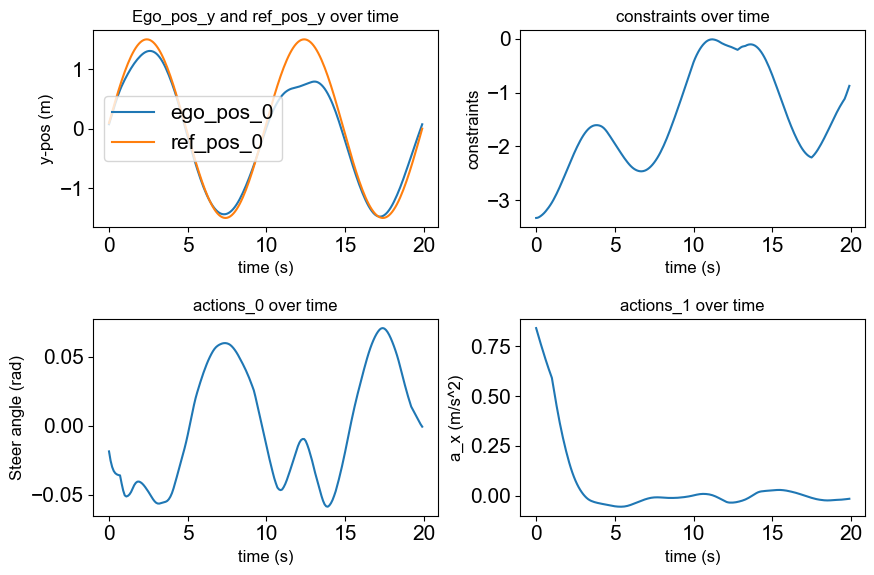

In [25]:
# plot curves
# draw a 2 * 2 figure, where the top left is the ref_pos_1 (red) and ego_pos_1 (blue) evolution
# over time; top right the constraints; bottom left the actions_0; bottom right the actions_1
fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs[0, 0].plot(time_steps, ego_pos[:, 1], label="ego_pos_0")
axs[0, 0].plot(time_steps, ref_pos[:, 1], label="ref_pos_0")
axs[0, 0].set_title("Ego_pos_y and ref_pos_y over time", fontsize=12)
axs[0, 0].set_xlabel("time (s)", fontsize=12)
axs[0, 0].set_ylabel("y-pos (m)", fontsize=12)
axs[0, 0].legend()

axs[0, 1].plot(time_steps, constraints)
axs[0, 1].set_title("constraints over time", fontsize=12)
axs[0, 1].set_xlabel("time (s)", fontsize=12)
axs[0, 1].set_ylabel("constraints", fontsize=12)

axs[1, 0].plot(time_steps, smoothed_steer)
axs[1, 0].set_title("actions_0 over time", fontsize=12)
axs[1, 0].set_xlabel("time (s)", fontsize=12)
axs[1, 0].set_ylabel("Steer angle (rad)", fontsize=12)

axs[1, 1].plot(time_steps, smoothed_throttle)
axs[1, 1].set_title("actions_1 over time", fontsize=12)
axs[1, 1].set_xlabel("time (s)", fontsize=12)
axs[1, 1].set_ylabel("a_x (m/s^2)", fontsize=12)

fig.tight_layout()

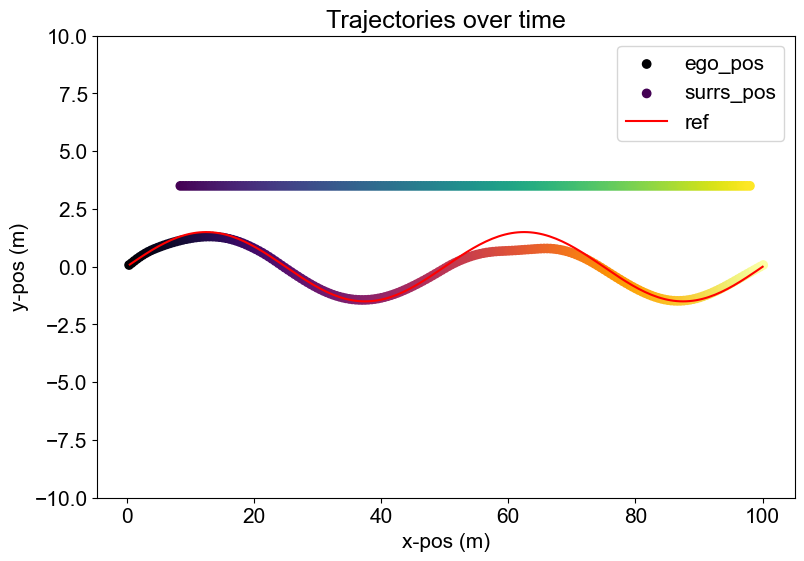

In [5]:
# draw a figure about the ego_pos, surrs_poses, ref_pos evoluation
# x-pos_0, y-pos_1 with scatter
# the color should be darker as time goes by

fig, axs = plt.subplots(1, 1, figsize=(9, 6))
axs.scatter(ego_pos[:, 0], ego_pos[:, 1], c=time_steps, label="ego_pos", cmap="inferno")
axs.scatter(surrs_poses[:, :, 0], surrs_poses[:, :, 1], c=time_steps, label="surrs_pos", cmap="viridis")
axs.plot(ref_pos[:, 0], ref_pos[:, 1], label="ref", c="red")
axs.set_title("Trajectories over time")
axs.set_xlabel("x-pos (m)")
axs.set_ylabel("y-pos (m)")
axs.set_ylim(-10, 10)
axs.legend()

In [6]:
# draw animations
fig = plt.figure()
im = plt.imshow(video[0,:,:,:])
plt.axis('off')

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:,:])

def animate(i):
    im.set_data(video[i,:,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

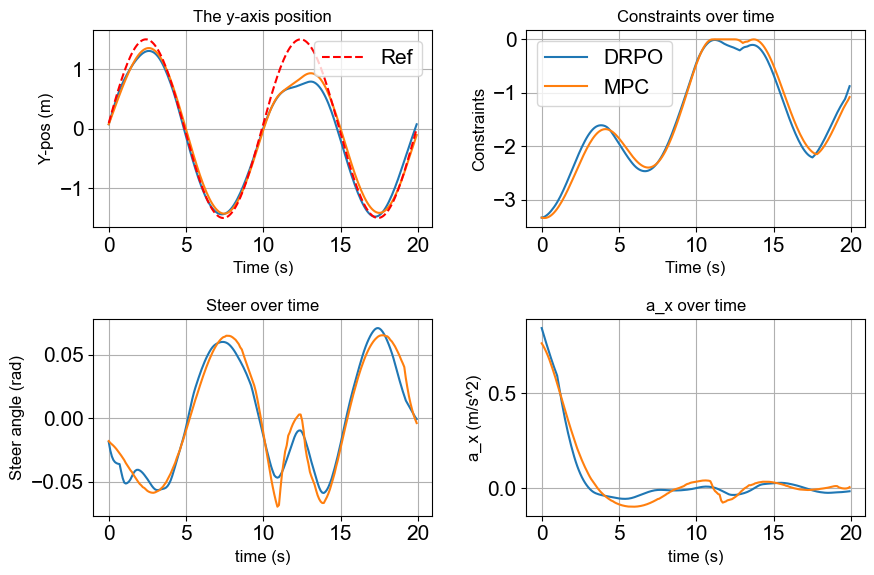

In [26]:
# load MPC data to a dataframe and plot comparison
mpc_data = pd.read_csv(run_dir / "MPC" / 'mpc_data.csv')

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs[0, 0].plot(time_steps, ego_pos[:, 1])
axs[0, 0].plot(time_steps, mpc_data["ego_pos_1"])
axs[0, 0].plot(time_steps, ref_pos[:, 1], label="Ref", c="red", linestyle="--")
axs[0, 0].set_title("The y-axis position", fontsize=12)
axs[0, 0].set_xlabel("Time (s)", fontsize=12)
axs[0, 0].set_ylabel("Y-pos (m)", fontsize=12)
axs[0, 0].legend()

axs[0, 1].plot(time_steps, constraints, label="DRPO")
axs[0, 1].plot(time_steps, mpc_data["constraints"], label="MPC")
axs[0, 1].set_title("Constraints over time", fontsize=12)
axs[0, 1].set_xlabel("Time (s)", fontsize=12)
axs[0, 1].set_ylabel("Constraints", fontsize=12)
axs[0, 1].legend()

axs[1, 0].plot(time_steps, smoothed_steer, label="DRPO")
axs[1, 0].plot(time_steps, mpc_data["actions_0"], label="MPC")
axs[1, 0].set_title("Steer over time", fontsize=12)
axs[1, 0].set_xlabel("time (s)", fontsize=12)
axs[1, 0].set_ylabel("Steer angle (rad)", fontsize=12)

axs[1, 1].plot(time_steps, smoothed_throttle, label="DRPO")
axs[1, 1].plot(time_steps, mpc_data["actions_1"], label="MPC")
axs[1, 1].set_title("a_x over time", fontsize=12)
axs[1, 1].set_xlabel("time (s)", fontsize=12)
axs[1, 1].set_ylabel("a_x (m/s^2)", fontsize=12)

for ax in axs.flat:
    ax.grid(True)
fig.tight_layout()

In [27]:
# compute the steer and a_x max and mean error and print
steer_error = np.abs(smoothed_steer - mpc_data["actions_0"])
steer_range = np.max(mpc_data["actions_0"]) - np.min(mpc_data["actions_0"])
ax_error = np.abs(smoothed_throttle - mpc_data["actions_1"])
ax_range = np.max(mpc_data["actions_1"]) - np.min(mpc_data["actions_1"])

print(f"steer max error: {np.max(steer_error) / steer_range}, mean error: {np.mean(steer_error) / steer_range}")
print(f"a_x max error: {np.max(ax_error) / ax_range}, mean error: {np.mean(ax_error) / ax_range}")

steer max error: 0.1692157609227151, mean error: 0.05602521300063411
a_x max error: 0.10832859596221935, mean error: 0.03581488738264668


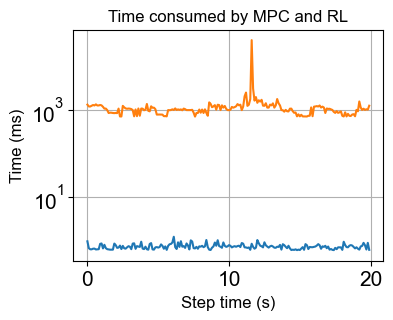

In [9]:
# plot the time consumed by MPC and RL with log-y
fig, axs = plt.subplots(1, 1, figsize=(4, 3))
axs.plot(time_steps, np.array(info_traj[0]["time"]) * 1000, label="DRPO")
axs.plot(time_steps, mpc_data["time"] * 1000, label="MPC")
axs.set_title("Time consumed by MPC and RL", fontsize=12)
axs.set_xlabel("Step time (s)", fontsize=12)
axs.set_ylabel("Time (ms)", fontsize=12)
axs.set_yscale("log")

# turn on the grid
axs.grid(True)